In [1]:
import pandas as pd

data = pd.read_csv('dados2.csv')

data['Class'] =  data['home_team_goal'] - data['away_team_goal']
data['home'] = [1 if  (a>0) else 0 for a in data['Class']]
data['away'] = [1 if  (a<0) else 0 for a in data['Class']]
data['draw'] = [1 if  (a==0) else 0 for a in data['Class']]
data=data.drop(['Unnamed: 0','Class'],axis=1)


#Converting season values

def change_season(match):
    if match['season'] =='2008/2009':
        return 0
    elif match['season'] =='2009/2010':
        return 1
    elif match['season'] =='2010/2011':
        return 2
    elif match['season'] =='2011/2012':
        return 3
    elif match['season'] =='2012/2013':
        return 4
    elif match['season'] =='2013/2014':
        return 5
    elif match['season'] =='2014/2015':
        return 6
    else:
        return 7
    
data['season']=data.apply(change_season, axis=1) 

#Classifing Match output

def determine_home_result(match):
    if match['home_team_goal'] > match['away_team_goal']:
        return 'H'
    elif match['home_team_goal'] < match['away_team_goal']:
        return 'A'
    else:
        return 'D'
    
    
data['Output']=data.apply(determine_home_result, axis=1)

data= data.dropna()

#Mais de 66% jogo de super favorito
#Entre 45 e 65% jogo de favorito
#Demais jogos equilibrados
import pandasql as pdsql
pysql = lambda q: pdsql.sqldf(q, globals())


sf_data = pysql("Select * from data where B365H<= 1.5 or B365A<=1.5")
f_data = pysql("Select * from data where (B365H between 1.51 and 2.20) or (B365A between 1.51 and 2.20)")
eq_data = pysql("Select * from data where B365H>=2.22 and B365A>=2.22")

print len(sf_data)
print len(f_data)
print len(eq_data)


3643
8426
4344


In [2]:

print (sum(sf_data['home'])*1.0/len(sf_data)),(sum(sf_data['draw'])*1.0/len(sf_data)),(sum(sf_data['away'])*1.0/len(sf_data))
print (sum(f_data['home'])*1.0/len(f_data)),(sum(f_data['draw'])*1.0/len(f_data)),(sum(f_data['away'])*1.0/len(f_data))
print (sum(eq_data['home'])*1.0/len(eq_data)),(sum(eq_data['draw'])*1.0/len(eq_data)),(sum(eq_data['away'])*1.0/len(eq_data))

0.632720285479 0.164973922591 0.20230579193
0.440659862331 0.266674578685 0.292665558984
0.373388581952 0.29650092081 0.330110497238


In [3]:
ft=[u'hg_V', u'hg_D', u'hg_E', u'hg_GF', u'hg_AVG_GF', u'hg_GS',
       u'hg_AVG_GS', u'hg_J1GS', u'hg_J1GF', u'hg_BTTS', u'hg_Over2',
       u'hg_Over3', u'hg_Over4', u'hg_WinningCleanSheet', u'hg_LosingFS',
       u'hg_FailedScore', u'hg_CleanSheet', u'hg_AVG_GOALS', u'hgc_V',
       u'hgc_D', u'hgc_E', u'hgc_GF', u'hgc_AVG_GF', u'hgc_GS',
       u'hgc_AVG_GS', u'hgc_J1GS', u'hgc_J1GF', u'hgc_BTTS', u'hgc_Over2',
       u'hgc_Over3', u'hgc_Over4', u'hgc_WinningCleanSheet',
       u'hgc_LosingFS', u'hgc_FailedScore', u'hgc_CleanSheet',
       u'hgc_AVG_GOALS', u'hl_V', u'hl_D', u'hl_E', u'hl_GF', u'hl_AVG_GF',
       u'hl_GS', u'hl_AVG_GS', u'hl_J1GS', u'hl_J1GF', u'hl_BTTS',
       u'hl_Over2', u'hl_Over3', u'hl_Over4', u'hl_WinningCleanSheet',
       u'hl_LosingFS', u'hl_FailedScore', u'hl_CleanSheet',
       u'hl_AVG_GOALS', u'hlc_V', u'hlc_D', u'hlc_E', u'hlc_GF',
       u'hlc_AVG_GF', u'hlc_GS', u'hlc_AVG_GS', u'hlc_J1GS', u'hlc_J1GF',
       u'hlc_BTTS', u'hlc_Over2', u'hlc_Over3', u'hlc_Over4',
       u'hlc_WinningCleanSheet', u'hlc_LosingFS', u'hlc_FailedScore',
       u'hlc_CleanSheet', u'hlc_AVG_GOALS', u'ag_V', u'ag_D', u'ag_E',
       u'ag_GF', u'ag_AVG_GF', u'ag_GS', u'ag_AVG_GS', u'ag_J1GS',
       u'ag_J1GF', u'ag_BTTS', u'ag_Over2', u'ag_Over3', u'ag_Over4',
       u'ag_WinningCleanSheet', u'ag_LosingFS', u'ag_FailedScore',
       u'ag_CleanSheet', u'ag_AVG_GOALS', u'agc_V', u'agc_D', u'agc_E',
       u'agc_GF', u'agc_AVG_GF', u'agc_GS', u'agc_AVG_GS', u'agc_J1GS',
       u'agc_J1GF', u'agc_BTTS', u'agc_Over2', u'agc_Over3', u'agc_Over4',
       u'agc_WinningCleanSheet', u'agc_LosingFS', u'agc_FailedScore',
       u'agc_CleanSheet', u'agc_AVG_GOALS', u'al_V', u'al_D', u'al_E',
       u'al_GF', u'al_AVG_GF', u'al_GS', u'al_AVG_GS', u'al_J1GS',
       u'al_J1GF', u'al_BTTS', u'al_Over2', u'al_Over3', u'al_Over4',
       u'al_WinningCleanSheet', u'al_LosingFS', u'al_FailedScore',
       u'al_CleanSheet', u'al_AVG_GOALS', u'alc_V', u'alc_D', u'alc_E',
       u'alc_GF', u'alc_AVG_GF', u'alc_GS', u'alc_AVG_GS', u'alc_J1GS',
       u'alc_J1GF', u'alc_BTTS', u'alc_Over2', u'alc_Over3', u'alc_Over4',
       u'alc_WinningCleanSheet', u'alc_LosingFS', u'alc_FailedScore',
       u'alc_CleanSheet', u'alc_AVG_GOALS', u'ga_rank_def', u'ga_rank_atk',
       u'gh_rank_def', u'gh_rank_atk', u'la_rank_def', u'la_rank_atk',
       u'lh_rank_def', u'lh_rank_atk', u'a_date', u'h_date', u'stage']

out2 = ['home','draw','away']
out = ['Output']

from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.svm import SVC
from matplotlib import pyplot as plt

def setRF(X_train,y_train,X_test,y_test):
    n = [50,100,500,1000,2000,3000]
    max = 0
    nmax = 0
    rmax=[]
    for estimator in n :
        rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
        rf.fit(X_train,y_train)
        score = rf.score(X_test,y_test) 
        if (score > max):
            max = score
            nmax=estimator
            rmax=rf
    return max, nmax,rmax
leagues = [21518,1729,4769,10257]
bar_width=0.18
from sklearn.metrics import accuracy_score

def IDtoStr(league_id):
    league_id = int(league_id)
    if league_id == 1729 : 
        return "Liga Inglesa"
    elif league_id == 4769 : 
        return "Liga Francesa"
    elif league_id == 7809 : 
        return "Liga Alema"
    elif league_id == 10257 : 
        return "Liga Italiana"
    elif league_id == 21518 : 
        return "Liga Espanhola"
    else:
        return "Liga Portuguesa"
    
def accumulative_acc(dados,leagues):
    for league in leagues:
        dado_aux = dados[dados['league_id'] == league]
    
        limit = dado_aux[['league_id','season']]['season'].unique()
        season = limit[:-1]
        test = dado_aux[dado_aux['season']>= limit[-1]]
        print "League - " + str(league)
        log=[]
        svm=[]
        rdf=[]
        naive=[]
        rf_list=[]
        for s in season:
            train= dado_aux[dado_aux['season']<= s]

            X_train= train[ft]
            y_train = train[out]
            X_test = test[ft]
            y_test = test[out]

            log_reg = LogisticRegression()
            log_reg.fit(X_train,y_train)
            rf_score,rf_estimator,rmax = setRF(X_train,y_train,X_test,y_test)
            svc_model = SVC(C=1)
            svc_model.fit(X_train,y_train)
            log.append(log_reg.score(X_test,y_test))
            rdf.append(rf_score)
            rf_list.append(rmax)
            svm.append(svc_model.score(X_test,y_test))
            ynaive=[y_train['Output'].mode()[0]]*len(y_test)
            naive.append(accuracy_score(y_test,ynaive))
        print rf_estimator
        print "LogReg"
        print log
        print "---\nRF"
        print rdf
        print "---\nSVM"
        print svm
        print "---\nNaive"
        print naive
        plt.figure()
    
        plt.bar(season,log,bar_width,alpha=0.8,color='g',label='LogReg',hatch='*')
        plt.bar(season+bar_width,rdf,bar_width,alpha=0.8,color='c',label='RF',hatch='.')
        plt.bar(season+(bar_width*2),svm,bar_width,alpha=0.8,color='b',label='SVM', hatch='//')
        plt.bar(season+(bar_width*3),naive,bar_width,alpha=0.8,color='y',label='Naive', hatch='-')
        
        plt.title('League -'+ IDtoStr(league))
        plt.ylabel('Accuracy')
        plt.xlabel('Acumulative Season')

        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
        plt.show()
    return rf_list

def k2_acc(dados,leagues):
    for league in leagues:
        dado_aux = dados[dados['league_id'] == league]
    
        limit = dado_aux[['league_id','season']]['season'].unique()
        season = limit[:-1]
    
        print "League - " + str(league)
        log=[]
        svm=[]
        rdf=[]
        base= season[0]
        xs=[]
        naive=[]
        rf_list=[]    
        for i in range(1,len(season)):
            upper= season[i]
        
            dado= dado_aux[dado_aux['season']<= upper]
            train= dado[dado['season']>= base]
            test = dado_aux[dado_aux['season'] == upper+1]
            X_train= train[ft]
            y_train = train[out]
            X_test = test[ft]
            y_test = test[out]

            aux = str(base) + "-" + str(upper)
            print aux

            log_reg = LogisticRegression()
            log_reg.fit(X_train,y_train)
            rf_score,rf_estimator,rf_max = setRF(X_train,y_train,X_test,y_test)
            svc_model = SVC(C=1)
            svc_model.fit(X_train,y_train)
            log.append(log_reg.score(X_test,y_test))
            rdf.append(rf_score)
            rf_list.append(rf_max)
            svm.append(svc_model.score(X_test,y_test))
            print rf_estimator
            xs.append(str(aux))
            ynaive=[y_train['Output'].mode()[0]]*len(y_test)
            naive.append(accuracy_score(y_test,ynaive))
            base = upper
        print "LogReg"
        print log
        print "---\nRF"
        print rdf
        print "---\nSVM"
        print svm
        print "---\nNaive"
        print naive
        plt.figure()
    
        plt.bar(season[:-1],log,bar_width,alpha=0.8,color='g',label='LogReg',hatch='*')
        plt.bar(season[:-1]+bar_width,rdf,bar_width,alpha=0.8,color='c',label='RF',hatch='.')
        plt.bar(season[:-1]+(bar_width*2),svm,bar_width,alpha=0.8,color='b',label='SVM', hatch='//')
        plt.bar(season[:-1]+(bar_width*3),naive,bar_width,alpha=0.8,color='y',label='Naive', hatch='-')
        plt.xticks(season[:-1], xs)
    
        plt.title('League -'+ IDtoStr(league))
        plt.ylabel('Accuracy')
        plt.xlabel('Acumulative Season')

        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
        plt.show()
    return rf_list

def k3_acc(dados,leagues):
    for league in leagues:
        dado_aux = dados[dados['league_id'] == league]
        limit = dado_aux[['league_id','season']]['season'].unique()
        season = limit[:-1]
        test = dado_aux[dado_aux['season']>= limit[-1]]
        print "League - " + str(league)
        log=[]
        svm=[]
        rdf=[]
        base= season[0]
        xs=[]
        naive=[]
        rf_list=[]
        for i in range(2,len(season)):
            upper= season[i]
        
            dado= dado_aux[dado_aux['season']<= upper]
            train= dado[dado['season']>= base]
            test = dado_aux[dado_aux['season'] == upper+1]

            X_train= train[ft]
            y_train = train[out]
            X_test = test[ft]
            y_test = test[out]

            aux = str(base) + "-" + str(upper)
            print aux

            log_reg = LogisticRegression()
            log_reg.fit(X_train,y_train)
            rf_score,rf_estimator,rf_max = setRF(X_train,y_train,X_test,y_test)
            svc_model = SVC(C=1)
            svc_model.fit(X_train,y_train)
            log.append(log_reg.score(X_test,y_test))
            rdf.append(rf_score)
            rf_list.append(rf_max)
            svm.append(svc_model.score(X_test,y_test))
            print rf_estimator
            xs.append(str(aux))
            base = upper-1
            ynaive=[y_train['Output'].mode()[0]]*len(y_test)
            naive.append(accuracy_score(y_test,ynaive))
        print "LogReg"
        print log
        print "---\nRF"
        print rdf
        print "---\nSVM"
        print svm
        print "---\nNaive"
        print naive
        plt.figure()
    
        plt.bar(season[:-2],log,bar_width,alpha=0.8,color='g',label='LogReg',hatch='*')
        plt.bar(season[:-2]+bar_width,rdf,bar_width,alpha=0.8,color='c',label='RF',hatch='.')
        plt.bar(season[:-2]+(bar_width*2),svm,bar_width,alpha=0.8,color='b',label='SVM', hatch='//')
        plt.bar(season[:-2]+(bar_width*3),naive,bar_width,alpha=0.8,color='y',label='Naive', hatch='-')
    
        plt.xticks(season[:-2], xs)
    
        plt.title(IDtoStr(league))
        plt.ylabel('Accuracy')
        plt.xlabel('Acumulative Season')

        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
        plt.show()
    return rf_list



/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:55: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


----SF - ACC----
League - 21518
500
LogReg
[0.53846153846153844, 0.61538461538461542, 0.61538461538461542, 0.53846153846153844, 0.62637362637362637, 0.65934065934065933, 0.69230769230769229]
---
RF
[0.81318681318681318, 0.80219780219780223, 0.82417582417582413, 0.80219780219780223, 0.79120879120879117, 0.81318681318681318, 0.82417582417582413]
---
SVM
[0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028]
---
Naive
[0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028]


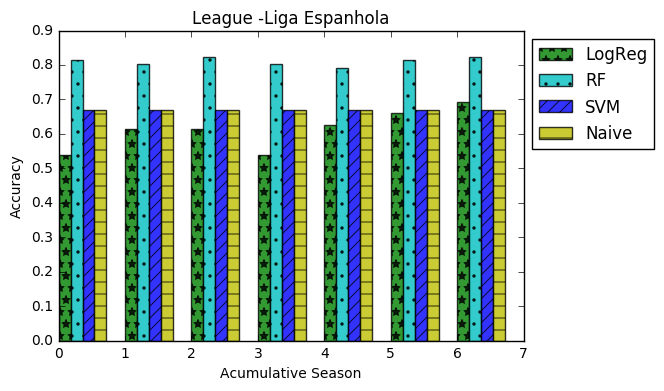

League - 1729
100
LogReg
[0.65384615384615385, 0.63461538461538458, 0.63461538461538458, 0.65384615384615385, 0.63461538461538458, 0.65384615384615385, 0.63461538461538458]
---
RF
[0.69230769230769229, 0.71153846153846156, 0.69230769230769229, 0.69230769230769229, 0.71153846153846156, 0.71153846153846156, 0.71153846153846156]
---
SVM
[0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385]
---
Naive
[0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385]


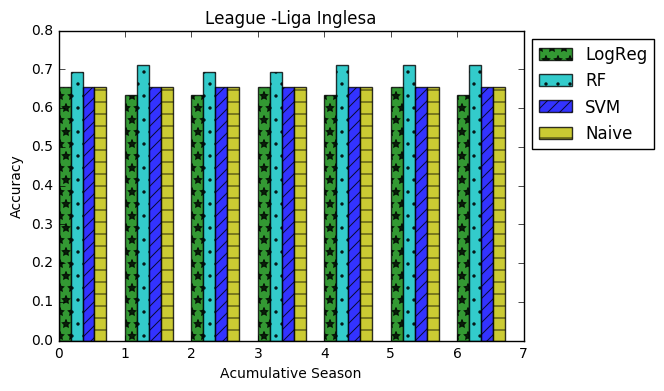

League - 4769
100
LogReg
[0.45652173913043476, 0.54347826086956519, 0.54347826086956519, 0.52173913043478259, 0.56521739130434778, 0.52173913043478259, 0.65217391304347827]
---
RF
[0.63043478260869568, 0.78260869565217395, 0.76086956521739135, 0.76086956521739135, 0.71739130434782605, 0.80434782608695654, 0.80434782608695654]
---
SVM
[0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308]
---
Naive
[0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308]


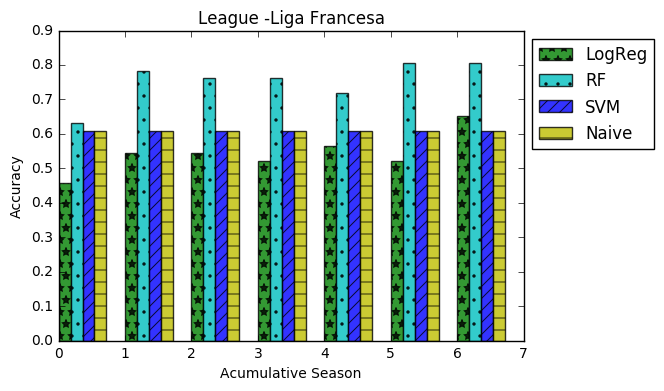

League - 10257
3000
LogReg
[0.57352941176470584, 0.55882352941176472, 0.61764705882352944, 0.47058823529411764, 0.58823529411764708, 0.6470588235294118, 0.66176470588235292]
---
RF
[0.61764705882352944, 0.76470588235294112, 0.73529411764705888, 0.73529411764705888, 0.76470588235294112, 0.76470588235294112, 0.75]
---
SVM
[0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416]
---
Naive
[0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416]


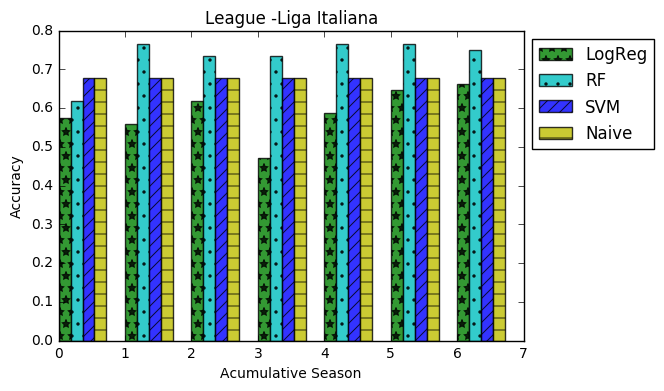

----SF - K2----
League - 21518
0-1
100
1-2
2000
2-3
50
3-4
50
4-5
50
5-6
500
LogReg
[0.55263157894736847, 0.6404494382022472, 0.44705882352941179, 0.63888888888888884, 0.6428571428571429, 0.61538461538461542]
---
RF
[0.72368421052631582, 0.7415730337078652, 0.82352941176470584, 0.71296296296296291, 0.80612244897959184, 0.82417582417582413]
---
SVM
[0.57894736842105265, 0.5280898876404494, 0.6705882352941176, 0.64814814814814814, 0.65306122448979587, 0.67032967032967028]
---
Naive
[0.57894736842105265, 0.5280898876404494, 0.6588235294117647, 0.64814814814814814, 0.65306122448979587, 0.67032967032967028]


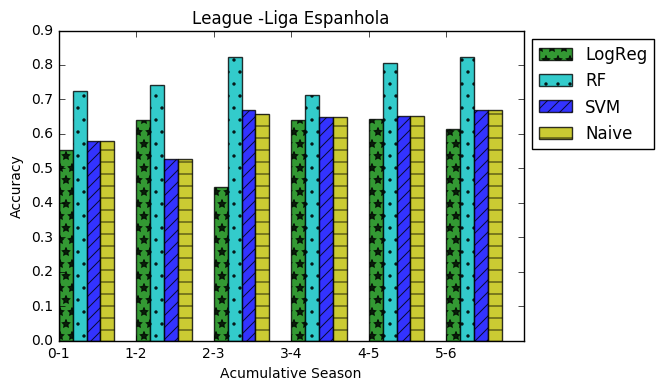

League - 1729
0-1
100
1-2
50
2-3
500
3-4
500
4-5
100
5-6
50
LogReg
[0.54545454545454541, 0.57471264367816088, 0.60526315789473684, 0.58227848101265822, 0.55072463768115942, 0.51923076923076927]
---
RF
[0.63636363636363635, 0.67816091954022983, 0.76315789473684215, 0.77215189873417722, 0.76811594202898548, 0.67307692307692313]
---
SVM
[0.60606060606060608, 0.58620689655172409, 0.72368421052631582, 0.68354430379746833, 0.71014492753623193, 0.65384615384615385]
---
Naive
[0.60606060606060608, 0.58620689655172409, 0.72368421052631582, 0.68354430379746833, 0.71014492753623193, 0.65384615384615385]


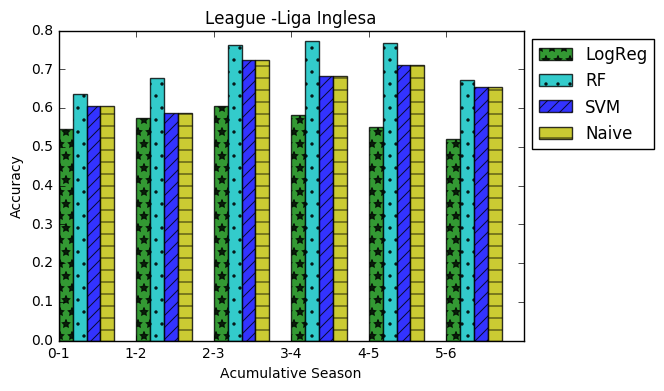

League - 4769
0-1
100
1-2
50
2-3
50
3-4
100
4-5
50
5-6
50
LogReg
[0.59523809523809523, 0.61904761904761907, 0.57999999999999996, 0.42372881355932202, 0.5625, 0.71739130434782605]
---
RF
[0.69047619047619047, 0.7142857142857143, 0.57999999999999996, 0.61016949152542377, 0.75, 0.82608695652173914]
---
SVM
[0.66666666666666663, 0.7142857142857143, 0.59999999999999998, 0.66101694915254239, 0.66666666666666663, 0.60869565217391308]
---
Naive
[0.66666666666666663, 0.7142857142857143, 0.59999999999999998, 0.66101694915254239, 0.66666666666666663, 0.60869565217391308]


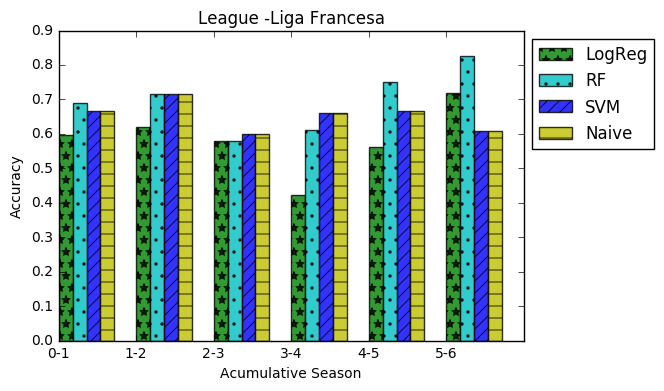

League - 10257
0-1
500
1-2
50
2-3
3000
3-4
500
4-5
100
5-6
100
LogReg
[0.51666666666666672, 0.48214285714285715, 0.62121212121212122, 0.52000000000000002, 0.52307692307692311, 0.63235294117647056]
---
RF
[0.69999999999999996, 0.625, 0.78787878787878785, 0.80000000000000004, 0.55384615384615388, 0.72058823529411764]
---
SVM
[0.65000000000000002, 0.5714285714285714, 0.71212121212121215, 0.69333333333333336, 0.55384615384615388, 0.67647058823529416]
---
Naive
[0.65000000000000002, 0.5714285714285714, 0.71212121212121215, 0.69333333333333336, 0.55384615384615388, 0.67647058823529416]


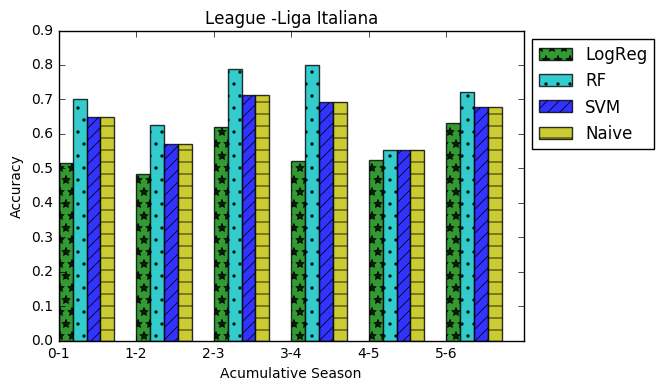

----SF - K3----
League - 21518
0-2
100
1-3
500
2-4
50
3-5
100
4-6
1000
LogReg
[0.6741573033707865, 0.51764705882352946, 0.60185185185185186, 0.61224489795918369, 0.58241758241758246]
---
RF
[0.7303370786516854, 0.80000000000000004, 0.72222222222222221, 0.83673469387755106, 0.82417582417582413]
---
SVM
[0.5280898876404494, 0.6588235294117647, 0.64814814814814814, 0.65306122448979587, 0.67032967032967028]
---
Naive
[0.5280898876404494, 0.6588235294117647, 0.64814814814814814, 0.65306122448979587, 0.67032967032967028]


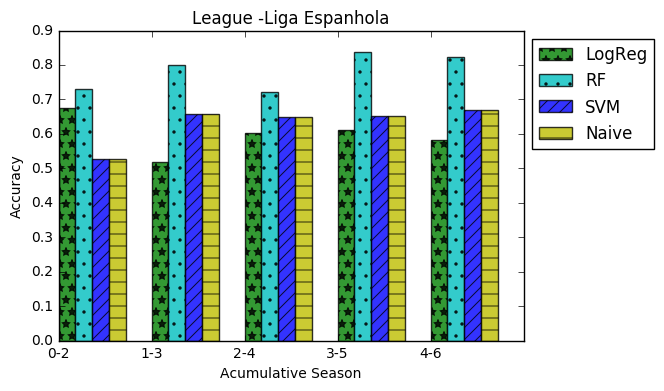

League - 1729
0-2
50
1-3
500
2-4
100
3-5
50
4-6
50
LogReg
[0.58620689655172409, 0.65789473684210531, 0.54430379746835444, 0.43478260869565216, 0.51923076923076927]
---
RF
[0.66666666666666663, 0.75, 0.759493670886076, 0.76811594202898548, 0.71153846153846156]
---
SVM
[0.58620689655172409, 0.72368421052631582, 0.68354430379746833, 0.71014492753623193, 0.65384615384615385]
---
Naive
[0.58620689655172409, 0.72368421052631582, 0.68354430379746833, 0.71014492753623193, 0.65384615384615385]


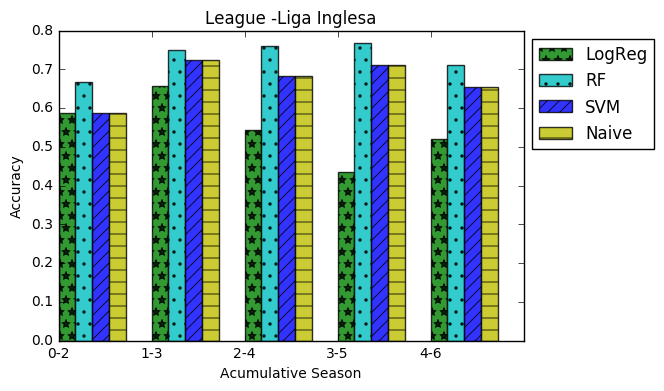

League - 4769
0-2
50
1-3
100
2-4
100
3-5
500
4-6
50
LogReg
[0.5714285714285714, 0.46000000000000002, 0.47457627118644069, 0.41666666666666669, 0.65217391304347827]
---
RF
[0.7142857142857143, 0.57999999999999996, 0.66101694915254239, 0.72916666666666663, 0.82608695652173914]
---
SVM
[0.7142857142857143, 0.59999999999999998, 0.66101694915254239, 0.66666666666666663, 0.60869565217391308]
---
Naive
[0.7142857142857143, 0.59999999999999998, 0.66101694915254239, 0.66666666666666663, 0.60869565217391308]


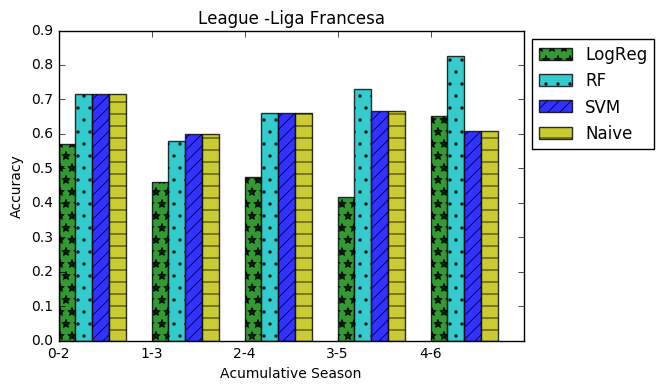

League - 10257
0-2
50
1-3
50
2-4
100
3-5
50
4-6
100
LogReg
[0.39285714285714285, 0.5, 0.54666666666666663, 0.55384615384615388, 0.6029411764705882]
---
RF
[0.6428571428571429, 0.80303030303030298, 0.78666666666666663, 0.56923076923076921, 0.73529411764705888]
---
SVM
[0.5714285714285714, 0.71212121212121215, 0.69333333333333336, 0.55384615384615388, 0.67647058823529416]
---
Naive
[0.5714285714285714, 0.71212121212121215, 0.69333333333333336, 0.55384615384615388, 0.67647058823529416]


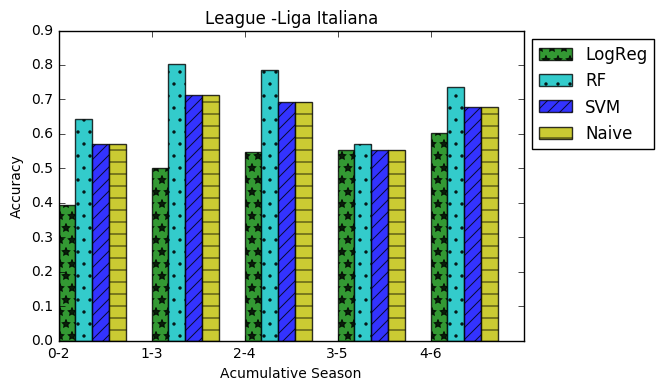

In [4]:
#Super Favoritos
print "----SF - ACC----"
sf_rf_acc_ac = accumulative_acc(sf_data,leagues)
print "----SF - K2----"
sf_rf_acc_k2 = k2_acc(sf_data,leagues)
print "----SF - K3----"
sf_rf_acc_k3 = k3_acc(sf_data,leagues)


----SF - ACC----
League - 21518


/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:55: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1000
LogReg
[0.26751592356687898, 0.31847133757961782, 0.32484076433121017, 0.36942675159235666, 0.36942675159235666, 0.38216560509554143, 0.36942675159235666]
---
RF
[0.4713375796178344, 0.47770700636942676, 0.49044585987261147, 0.52229299363057324, 0.52229299363057324, 0.49681528662420382, 0.49044585987261147]
---
SVM
[0.47770700636942676, 0.4713375796178344, 0.47770700636942676, 0.47770700636942676, 0.4713375796178344, 0.4713375796178344, 0.4713375796178344]
---
Naive
[0.47770700636942676, 0.47770700636942676, 0.47770700636942676, 0.47770700636942676, 0.47770700636942676, 0.47770700636942676, 0.47770700636942676]


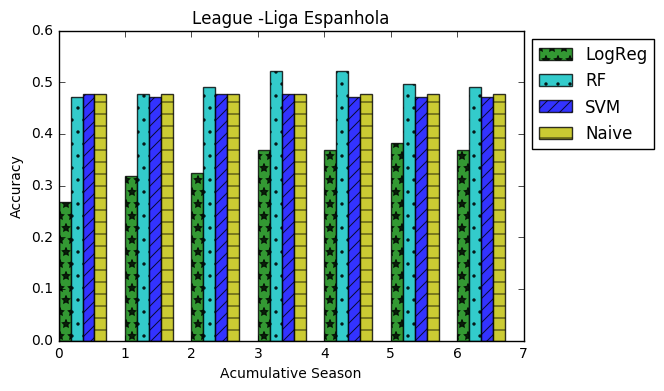

League - 1729
500
LogReg
[0.44886363636363635, 0.39204545454545453, 0.44318181818181818, 0.39772727272727271, 0.39772727272727271, 0.38636363636363635, 0.4375]
---
RF
[0.51704545454545459, 0.47727272727272729, 0.46590909090909088, 0.48295454545454547, 0.47727272727272729, 0.49431818181818182, 0.47159090909090912]
---
SVM
[0.42613636363636365, 0.43181818181818182, 0.43181818181818182, 0.43181818181818182, 0.4375, 0.43181818181818182, 0.42613636363636365]
---
Naive
[0.43181818181818182, 0.43181818181818182, 0.43181818181818182, 0.43181818181818182, 0.43181818181818182, 0.43181818181818182, 0.43181818181818182]


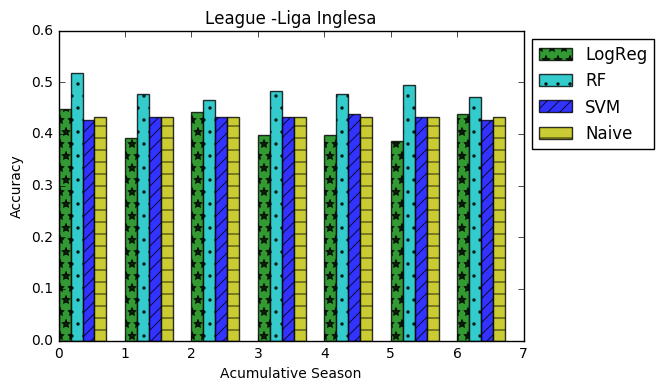

League - 4769
100
LogReg
[0.3532934131736527, 0.3413173652694611, 0.3772455089820359, 0.38323353293413176, 0.3413173652694611, 0.39520958083832336, 0.40119760479041916]
---
RF
[0.41916167664670656, 0.39520958083832336, 0.40718562874251496, 0.43113772455089822, 0.45508982035928142, 0.46706586826347307, 0.46107784431137727]
---
SVM
[0.41916167664670656, 0.43113772455089822, 0.43113772455089822, 0.43712574850299402, 0.43113772455089822, 0.43712574850299402, 0.43712574850299402]
---
Naive
[0.43712574850299402, 0.43712574850299402, 0.43712574850299402, 0.43712574850299402, 0.43712574850299402, 0.43712574850299402, 0.43712574850299402]


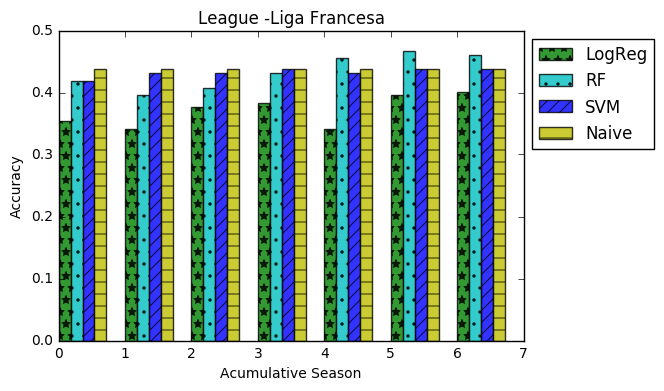

League - 10257
100
LogReg
[0.42937853107344631, 0.40677966101694918, 0.41807909604519772, 0.42372881355932202, 0.4463276836158192, 0.43502824858757061, 0.40112994350282488]
---
RF
[0.48022598870056499, 0.48587570621468928, 0.48022598870056499, 0.48587570621468928, 0.49152542372881358, 0.50282485875706218, 0.48022598870056499]
---
SVM
[0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.40112994350282488, 0.40112994350282488]
---
Naive
[0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.39548022598870058]


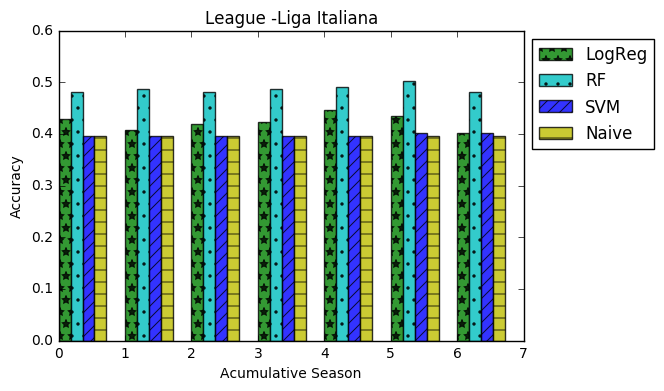

----SF - K2----
League - 21518
0-1
3000
1-2
100
2-3
100
3-4
3000
4-5
2000
5-6
1000
LogReg
[0.27567567567567569, 0.40259740259740262, 0.35999999999999999, 0.34615384615384615, 0.31168831168831168, 0.32484076433121017]
---
RF
[0.54594594594594592, 0.51298701298701299, 0.42285714285714288, 0.46794871794871795, 0.43506493506493504, 0.45222929936305734]
---
SVM
[0.55675675675675673, 0.4935064935064935, 0.43428571428571427, 0.41666666666666669, 0.38311688311688313, 0.46496815286624205]
---
Naive
[0.55675675675675673, 0.4935064935064935, 0.43428571428571427, 0.41666666666666669, 0.36363636363636365, 0.47770700636942676]


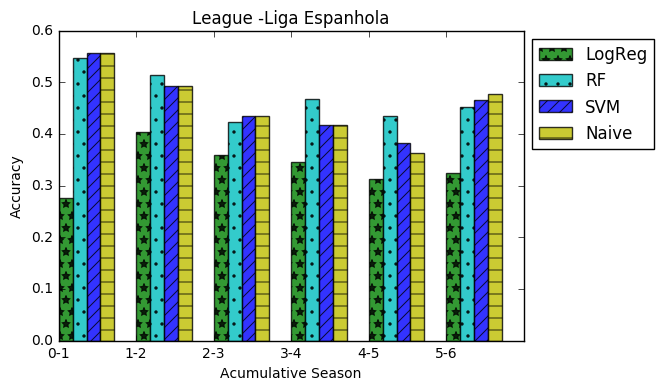

League - 1729
0-1
3000
1-2
1000
2-3
500
3-4
100
4-5
1000
5-6
500
LogReg
[0.35714285714285715, 0.35502958579881655, 0.42528735632183906, 0.33950617283950618, 0.42261904761904762, 0.38636363636363635]
---
RF
[0.45604395604395603, 0.42603550295857989, 0.40804597701149425, 0.50617283950617287, 0.45833333333333331, 0.4375]
---
SVM
[0.46153846153846156, 0.46153846153846156, 0.36781609195402298, 0.41358024691358025, 0.42857142857142855, 0.42613636363636365]
---
Naive
[0.46153846153846156, 0.46153846153846156, 0.36781609195402298, 0.41358024691358025, 0.43452380952380953, 0.43181818181818182]


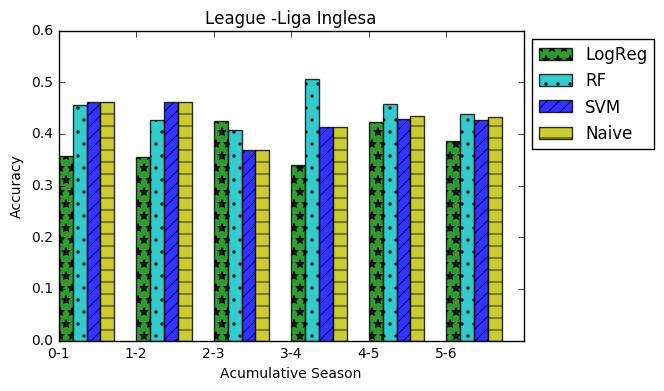

League - 4769
0-1
100
1-2
3000
2-3
3000
3-4
1000
4-5
500
5-6
2000
LogReg
[0.37948717948717947, 0.40588235294117647, 0.35195530726256985, 0.37640449438202245, 0.36931818181818182, 0.46706586826347307]
---
RF
[0.38974358974358975, 0.44117647058823528, 0.44692737430167595, 0.42696629213483145, 0.45454545454545453, 0.43113772455089822]
---
SVM
[0.39487179487179486, 0.5, 0.46927374301675978, 0.42134831460674155, 0.46022727272727271, 0.43712574850299402]
---
Naive
[0.38974358974358975, 0.49411764705882355, 0.46927374301675978, 0.4157303370786517, 0.47159090909090912, 0.43712574850299402]


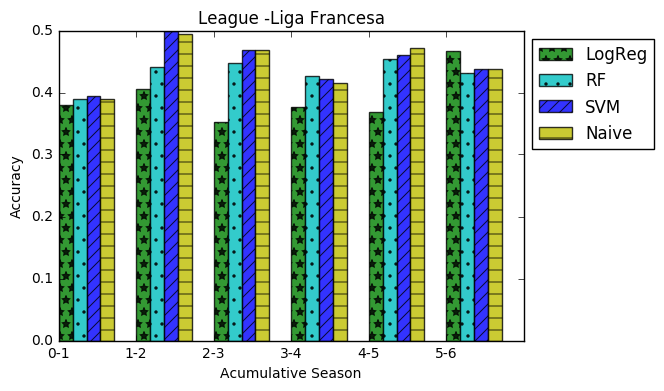

League - 10257
0-1
500
1-2
2000
2-3
1000
3-4
1000
4-5
50
5-6
50
LogReg
[0.36363636363636365, 0.40259740259740262, 0.38953488372093026, 0.38596491228070173, 0.34682080924855491, 0.33333333333333331]
---
RF
[0.51515151515151514, 0.47402597402597402, 0.44186046511627908, 0.43274853801169588, 0.39884393063583817, 0.43502824858757061]
---
SVM
[0.49090909090909091, 0.46103896103896103, 0.41279069767441862, 0.44444444444444442, 0.41618497109826591, 0.39548022598870058]
---
Naive
[0.49090909090909091, 0.46103896103896103, 0.41279069767441862, 0.44444444444444442, 0.41618497109826591, 0.39548022598870058]


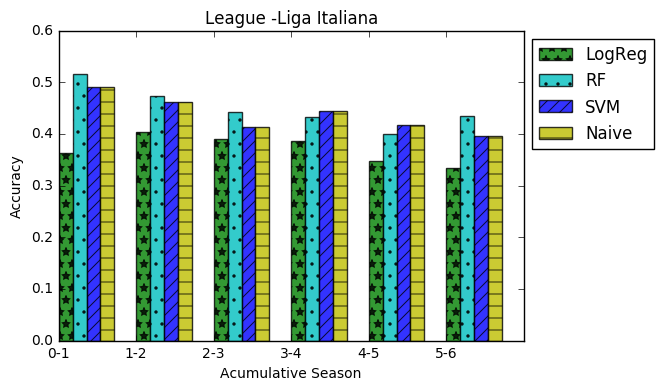

----SF - K3----
League - 21518
0-2
1000
1-3
100
2-4
50
3-5
50
4-6
2000
LogReg
[0.38961038961038963, 0.40571428571428569, 0.37179487179487181, 0.31818181818181818, 0.3503184713375796]
---
RF
[0.51298701298701299, 0.44, 0.44230769230769229, 0.44155844155844154, 0.45859872611464969]
---
SVM
[0.4935064935064935, 0.43428571428571427, 0.41666666666666669, 0.37662337662337664, 0.46496815286624205]
---
Naive
[0.4935064935064935, 0.43428571428571427, 0.41666666666666669, 0.36363636363636365, 0.47770700636942676]


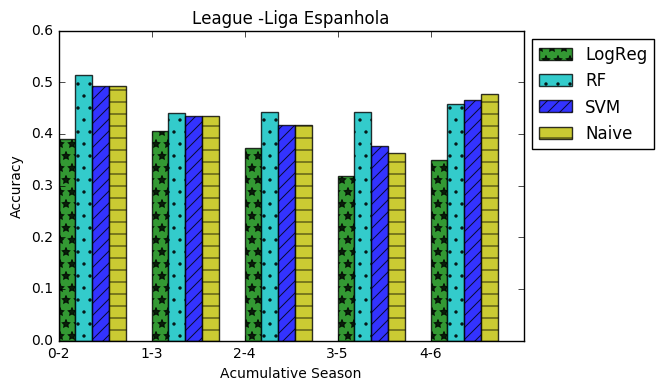

League - 1729
0-2
1000
1-3
50
2-4
2000
3-5
100
4-6
3000
LogReg
[0.36686390532544377, 0.40229885057471265, 0.33950617283950618, 0.48809523809523808, 0.36931818181818182]
---
RF
[0.45562130177514792, 0.43103448275862066, 0.51851851851851849, 0.49404761904761907, 0.47159090909090912]
---
SVM
[0.46153846153846156, 0.36781609195402298, 0.40740740740740738, 0.41666666666666669, 0.43181818181818182]
---
Naive
[0.46153846153846156, 0.36781609195402298, 0.41358024691358025, 0.43452380952380953, 0.43181818181818182]


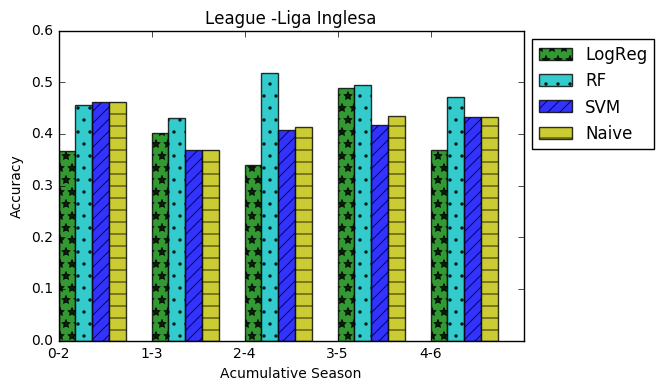

League - 4769
0-2
3000
1-3
100
2-4
50
3-5
1000
4-6
100
LogReg
[0.36470588235294116, 0.39664804469273746, 0.33707865168539325, 0.39204545454545453, 0.45508982035928142]
---
RF
[0.43529411764705883, 0.46927374301675978, 0.4157303370786517, 0.47159090909090912, 0.45508982035928142]
---
SVM
[0.50588235294117645, 0.46927374301675978, 0.4157303370786517, 0.45454545454545453, 0.43113772455089822]
---
Naive
[0.49411764705882355, 0.46927374301675978, 0.4157303370786517, 0.47159090909090912, 0.43712574850299402]


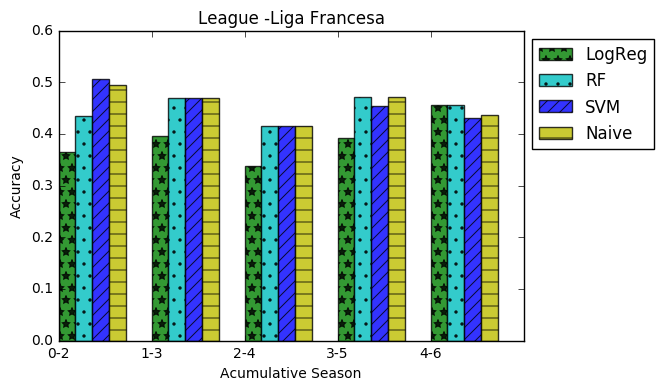

League - 10257
0-2
2000
1-3
500
2-4
3000
3-5
1000
4-6
100
LogReg
[0.40909090909090912, 0.38953488372093026, 0.39766081871345027, 0.41040462427745666, 0.33898305084745761]
---
RF
[0.51298701298701299, 0.47674418604651164, 0.47368421052631576, 0.41618497109826591, 0.49717514124293788]
---
SVM
[0.46103896103896103, 0.41279069767441862, 0.44444444444444442, 0.41618497109826591, 0.39548022598870058]
---
Naive
[0.46103896103896103, 0.41279069767441862, 0.44444444444444442, 0.41618497109826591, 0.39548022598870058]


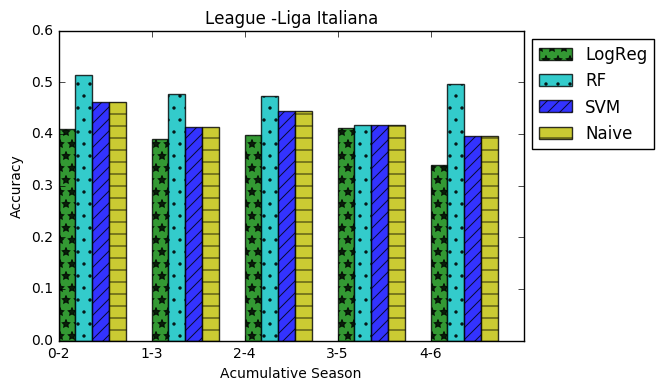

In [5]:
#Favoritos
print "----F - ACC----"
f_rf_acc_ac = accumulative_acc(f_data,leagues)
print "----F - K2----"
f_rf_acc_k2 = k2_acc(f_data,leagues)
print "----F - K3----"
f_rf_acc_k3 = k3_acc(f_data,leagues)


----SF - ACC----
League - 21518


/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:55: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


50
LogReg
[0.3902439024390244, 0.3048780487804878, 0.32926829268292684, 0.37804878048780488, 0.34146341463414637, 0.40243902439024393, 0.40243902439024393]
---
RF
[0.42682926829268292, 0.40243902439024393, 0.3902439024390244, 0.40243902439024393, 0.41463414634146339, 0.35365853658536583, 0.42682926829268292]
---
SVM
[0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583]
---
Naive
[0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583]


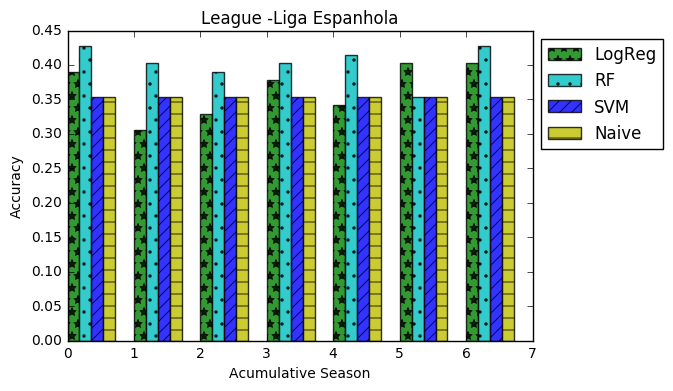

League - 1729
3000
LogReg
[0.30392156862745096, 0.26470588235294118, 0.38235294117647056, 0.36274509803921567, 0.39215686274509803, 0.39215686274509803, 0.40196078431372551]
---
RF
[0.24509803921568626, 0.29411764705882354, 0.26470588235294118, 0.29411764705882354, 0.30392156862745096, 0.40196078431372551, 0.37254901960784315]
---
SVM
[0.29411764705882354, 0.28431372549019607, 0.30392156862745096, 0.29411764705882354, 0.30392156862745096, 0.30392156862745096, 0.27450980392156865]
---
Naive
[0.30392156862745096, 0.30392156862745096, 0.30392156862745096, 0.30392156862745096, 0.30392156862745096, 0.30392156862745096, 0.30392156862745096]


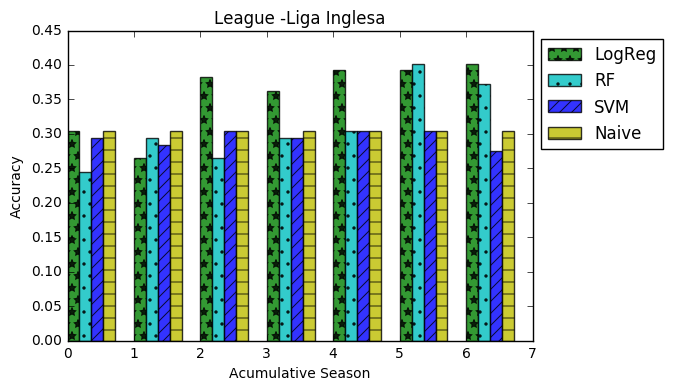

League - 4769
100
LogReg
[0.34482758620689657, 0.27586206896551724, 0.29310344827586204, 0.35344827586206895, 0.35344827586206895, 0.35344827586206895, 0.31896551724137934]
---
RF
[0.37068965517241381, 0.31896551724137934, 0.28448275862068967, 0.29310344827586204, 0.33620689655172414, 0.32758620689655171, 0.32758620689655171]
---
SVM
[0.29310344827586204, 0.31896551724137934, 0.31034482758620691, 0.31034482758620691, 0.31034482758620691, 0.34482758620689657, 0.31896551724137934]
---
Naive
[0.29310344827586204, 0.34482758620689657, 0.34482758620689657, 0.34482758620689657, 0.34482758620689657, 0.34482758620689657, 0.34482758620689657]


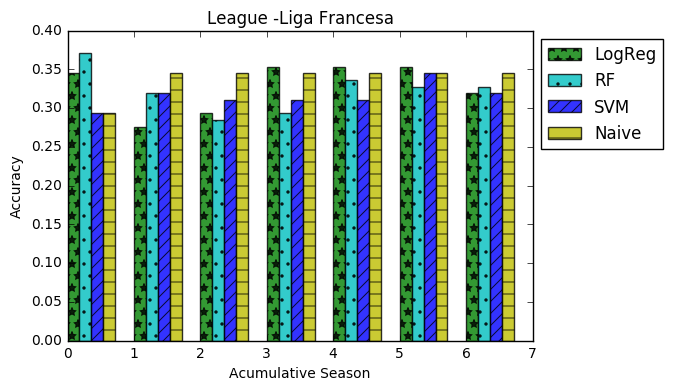

League - 10257
500
LogReg
[0.38823529411764707, 0.37647058823529411, 0.44705882352941179, 0.40000000000000002, 0.36470588235294116, 0.40000000000000002, 0.42352941176470588]
---
RF
[0.45882352941176469, 0.40000000000000002, 0.43529411764705883, 0.44705882352941179, 0.45882352941176469, 0.44705882352941179, 0.42352941176470588]
---
SVM
[0.40000000000000002, 0.40000000000000002, 0.38823529411764707, 0.40000000000000002, 0.38823529411764707, 0.37647058823529411, 0.36470588235294116]
---
Naive
[0.40000000000000002, 0.40000000000000002, 0.40000000000000002, 0.40000000000000002, 0.40000000000000002, 0.40000000000000002, 0.40000000000000002]


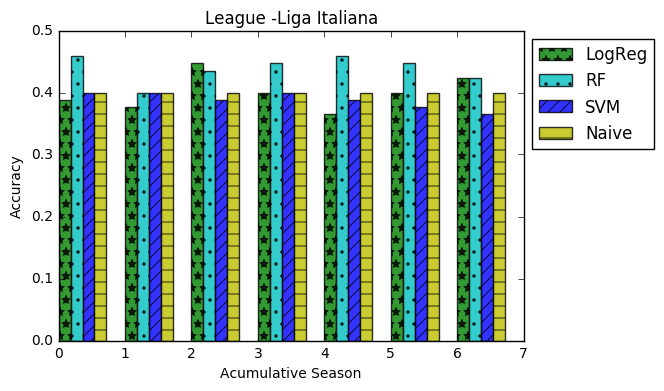

----SF - K2----
League - 21518
0-1
1000
1-2
100
2-3
50
3-4
100
4-5
500
5-6
2000
LogReg
[0.3188405797101449, 0.40229885057471265, 0.31428571428571428, 0.37878787878787878, 0.35897435897435898, 0.32926829268292684]
---
RF
[0.39130434782608697, 0.47126436781609193, 0.41428571428571431, 0.37878787878787878, 0.38461538461538464, 0.42682926829268292]
---
SVM
[0.43478260869565216, 0.45977011494252873, 0.42857142857142855, 0.34848484848484851, 0.38461538461538464, 0.34146341463414637]
---
Naive
[0.43478260869565216, 0.45977011494252873, 0.42857142857142855, 0.34848484848484851, 0.38461538461538464, 0.35365853658536583]


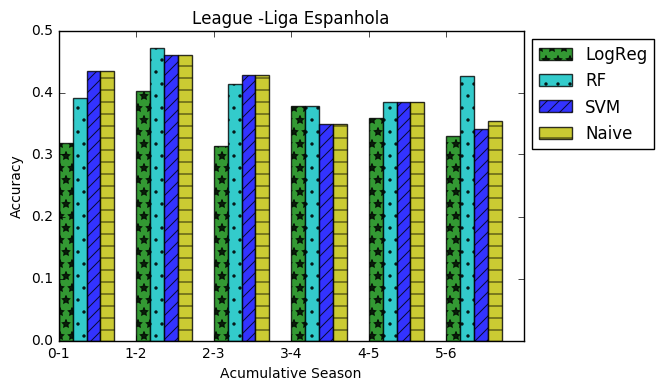

League - 1729
0-1
50
1-2
100
2-3
3000
3-4
50
4-5
50
5-6
50
LogReg
[0.35365853658536583, 0.41891891891891891, 0.3125, 0.3595505617977528, 0.32258064516129031, 0.33333333333333331]
---
RF
[0.32926829268292684, 0.35135135135135137, 0.42499999999999999, 0.38202247191011235, 0.34408602150537637, 0.35294117647058826]
---
SVM
[0.40243902439024393, 0.28378378378378377, 0.3125, 0.3146067415730337, 0.37634408602150538, 0.29411764705882354]
---
Naive
[0.40243902439024393, 0.29729729729729731, 0.29999999999999999, 0.29213483146067415, 0.38709677419354838, 0.30392156862745096]


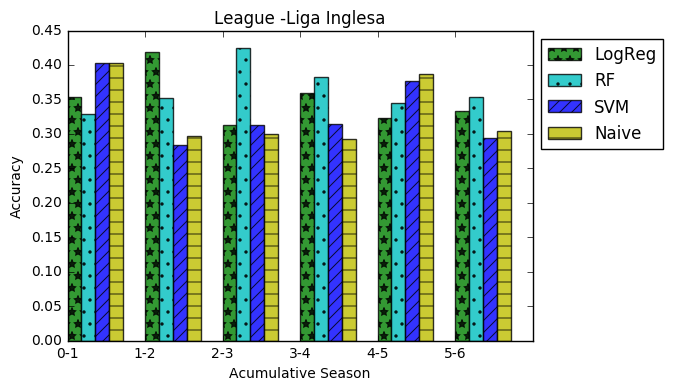

League - 4769
0-1
2000
1-2
1000
2-3
100
3-4
3000
4-5
100
5-6
50
LogReg
[0.30434782608695654, 0.33898305084745761, 0.29702970297029702, 0.30107526881720431, 0.31132075471698112, 0.29310344827586204]
---
RF
[0.29347826086956524, 0.33050847457627119, 0.31683168316831684, 0.34408602150537637, 0.39622641509433965, 0.31896551724137934]
---
SVM
[0.35869565217391303, 0.40677966101694918, 0.32673267326732675, 0.33333333333333331, 0.32075471698113206, 0.36206896551724138]
---
Naive
[0.38043478260869568, 0.40677966101694918, 0.33663366336633666, 0.34408602150537637, 0.330188679245283, 0.34482758620689657]


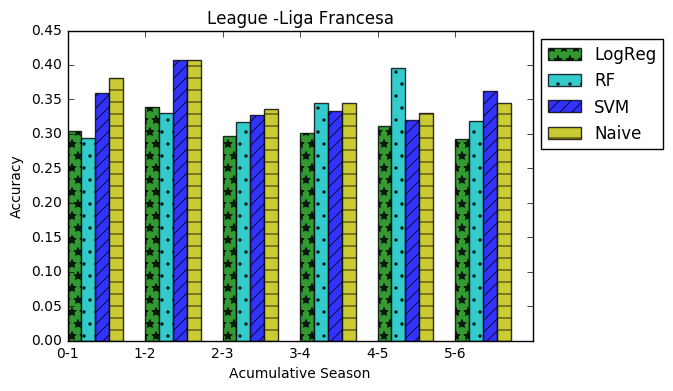

League - 10257
0-1
100
1-2
3000
2-3
100
3-4
1000
4-5
50
5-6
1000
LogReg
[0.3235294117647059, 0.3473684210526316, 0.40659340659340659, 0.38095238095238093, 0.4175824175824176, 0.36470588235294116]
---
RF
[0.36274509803921567, 0.44210526315789472, 0.40659340659340659, 0.41666666666666669, 0.38461538461538464, 0.37647058823529411]
---
SVM
[0.33333333333333331, 0.40000000000000002, 0.39560439560439559, 0.35714285714285715, 0.27472527472527475, 0.29411764705882354]
---
Naive
[0.34313725490196079, 0.41052631578947368, 0.4175824175824176, 0.35714285714285715, 0.2967032967032967, 0.30588235294117649]


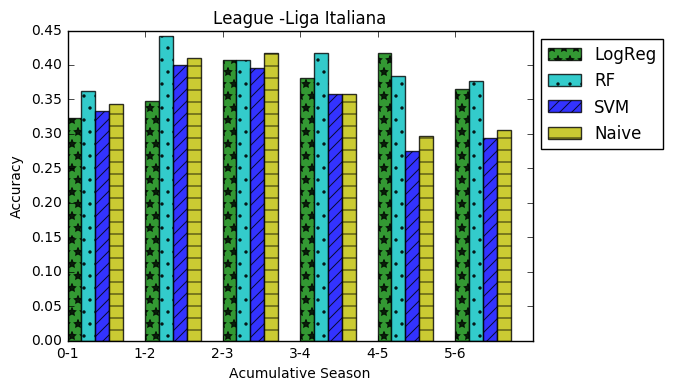

----SF - K3----
League - 21518
0-2
100
1-3
500
2-4
100
3-5
50
4-6
500
LogReg
[0.33333333333333331, 0.38571428571428573, 0.36363636363636365, 0.35897435897435898, 0.37804878048780488]
---
RF
[0.40229885057471265, 0.40000000000000002, 0.34848484848484851, 0.34615384615384615, 0.40243902439024393]
---
SVM
[0.45977011494252873, 0.42857142857142855, 0.34848484848484851, 0.38461538461538464, 0.35365853658536583]
---
Naive
[0.45977011494252873, 0.42857142857142855, 0.34848484848484851, 0.38461538461538464, 0.35365853658536583]


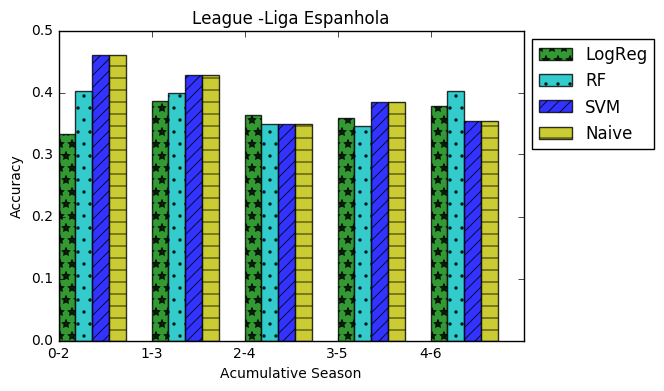

League - 1729
0-2
100
1-3
100
2-4
50
3-5
50
4-6
2000
LogReg
[0.35135135135135137, 0.29999999999999999, 0.38202247191011235, 0.37634408602150538, 0.33333333333333331]
---
RF
[0.33783783783783783, 0.45000000000000001, 0.39325842696629215, 0.35483870967741937, 0.49019607843137253]
---
SVM
[0.28378378378378377, 0.29999999999999999, 0.29213483146067415, 0.37634408602150538, 0.3235294117647059]
---
Naive
[0.29729729729729731, 0.29999999999999999, 0.29213483146067415, 0.38709677419354838, 0.30392156862745096]


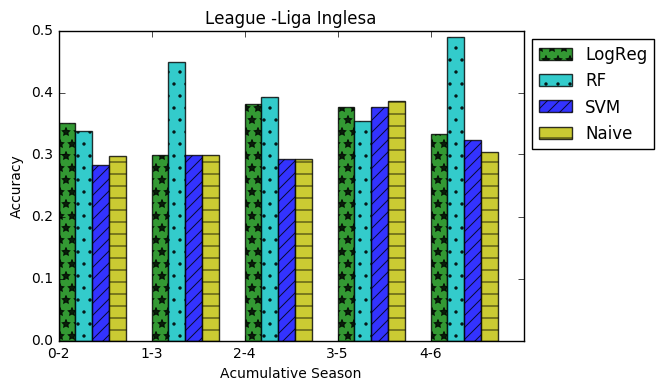

League - 4769
0-2
2000
1-3
50
2-4
50
3-5
100
4-6
100
LogReg
[0.33898305084745761, 0.27722772277227725, 0.29032258064516131, 0.30188679245283018, 0.31034482758620691]
---
RF
[0.39830508474576271, 0.35643564356435642, 0.43010752688172044, 0.37735849056603776, 0.37931034482758619]
---
SVM
[0.40677966101694918, 0.32673267326732675, 0.32258064516129031, 0.39622641509433965, 0.35344827586206895]
---
Naive
[0.40677966101694918, 0.33663366336633666, 0.34408602150537637, 0.3867924528301887, 0.34482758620689657]


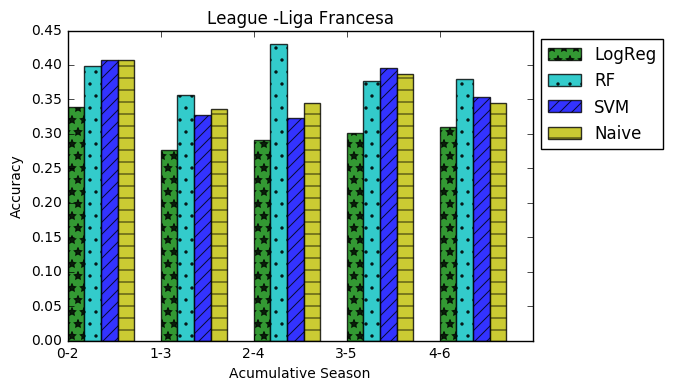

League - 10257
0-2
1000
1-3
1000
2-4
50
3-5
500
4-6
2000
LogReg
[0.32631578947368423, 0.39560439560439559, 0.42857142857142855, 0.30769230769230771, 0.3411764705882353]
---
RF
[0.47368421052631576, 0.42857142857142855, 0.44047619047619047, 0.38461538461538464, 0.41176470588235292]
---
SVM
[0.41052631578947368, 0.4175824175824176, 0.35714285714285715, 0.2857142857142857, 0.38823529411764707]
---
Naive
[0.41052631578947368, 0.4175824175824176, 0.35714285714285715, 0.2967032967032967, 0.40000000000000002]


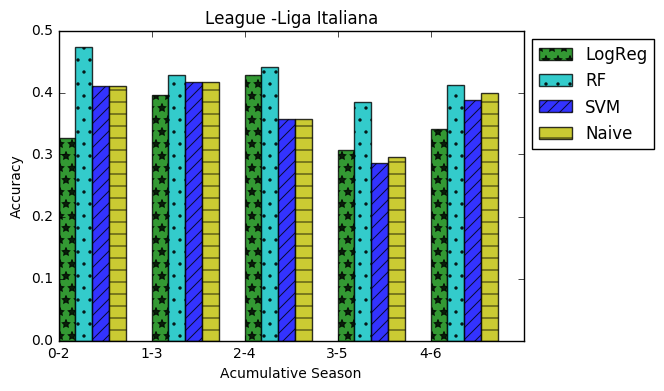

In [6]:
#Super Favoritos
print "----EQ - ACC----"
eq_rf_acc_ac = accumulative_acc(eq_data,leagues)
print "----EQ - K2----"
eq_rf_acc_k2 = k2_acc(eq_data,leagues)
print "----EQ - K3----"
eq_rf_acc_k3 = k3_acc(eq_data,leagues)

[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_jobs=-1, oob_score=False,
             random_state=None, verbose=0, warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_jobs=-1, oob_score=False,
             random_state=None, verbose=0, warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
       

In [9]:
from sklearn.metrics import f1_score

def setRFf1(X_train,y_train,X_test,y_test):
    n = [50,100,500,1000,2000,3000]
    f1mac = 0
    f1mic = 0
    nmax = 0
    max=0
    rf_max = []
    
    
    for estimator in n :
        rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
        rf.fit(X_train,y_train)
        y_pred = rf.predict(X_test) 
        f1_mic = f1_score(y_test, y_pred, average='micro')
        f1_mac = f1_score(y_test, y_pred, average='macro')
        if ( (f1_mic+f1_mac)/2 > max):
            max = (f1_mic+f1_mac)/2
            f1mac = f1_mac
            f1mic= f1_mic
            nmax=estimator
            rf_max=rf
            
    return f1mac,f1mic, nmax,rf_max

In [15]:
def accumulative_f1(dados,leagues):
    for league in leagues:
        dado_aux = dados[dados['league_id'] == league]
    
        limit = dado_aux[['league_id','season']]['season'].unique()
        season = limit[:-1]
        test = dado_aux[dado_aux['season']>= limit[-1]]
        print "League - " + str(league)
        log=[]
        svm=[]
        rdf=[]
        log2=[]
        svm2=[]
        rdf2=[]
        naive=[]
        naive2=[]
        rf_list=[]
       
        for s in season:
            train= dado_aux[dado_aux['season']<= s]

            X_train= train[ft]
            y_train = train['Output']
            X_test = test[ft]
            y_test = test['Output']

            log_reg = LogisticRegression()
            log_reg.fit(X_train,y_train)
            rf_mic,rf_mac,rf_estimator,rfmax = setRFf1(X_train,y_train,X_test,y_test)
            svc_model = SVC(C=1)
            svc_model.fit(X_train,y_train)
        
        
            logp = log_reg.predict(X_test)
            log.append(f1_score(y_test, logp, average='micro'))
            log2.append(f1_score(y_test, logp, average='macro'))
        
            svmp = svc_model.predict(X_test)
        
            rdf.append(rf_mic)
            rdf2.append(rf_mac)
            rf_list.append(rfmax)
            svm.append(f1_score(y_test, svmp, average='micro'))
            svm2.append(f1_score(y_test, svmp, average='macro'))
            ynaive=[y_train['Output'].mode()[0]]*len(y_test)
            naive.append(f1_score(y_test, ynaive, average='micro'))
            naive2.append(f1_score(y_test, ynaive, average='macro'))
            
        print rf_estimator
        print "LogReg"
        print log
        print "---\nRF"
        print rdf
        print "---\nSVM"
        print svm
        print "---\nNaive"
        print naive
        plt.figure()
    
        plt.bar(season,log,bar_width,alpha=0.8,color='g',label='LogReg',hatch='*')
        plt.bar(season+bar_width,rdf,bar_width,alpha=0.8,color='c',label='RF',hatch='.')
        plt.bar(season+(bar_width*2),svm,bar_width,alpha=0.8,color='b',label='SVM', hatch='//')
        plt.bar(season+(bar_width*3),naive,bar_width,alpha=0.8,color='y',label='Naive', hatch='-')
    

        plt.title('League -'+str(league))
        plt.ylabel('F1-Micro')
        plt.xlabel('Acumulative Season')
    
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
        plt.show()
    
        plt.figure()
    
        plt.bar(season,log2,bar_width,alpha=0.8,color='g',label='LogReg',hatch='*')
        plt.bar(season+bar_width,rdf2,bar_width,alpha=0.8,color='c',label='RF',hatch='.')
        plt.bar(season+(bar_width*2),svm2,bar_width,alpha=0.8,color='b',label='SVM', hatch='//')
        plt.bar(season+(bar_width*3),naive2,bar_width,alpha=0.8,color='y',label='Naive', hatch='-')
        

        plt.title(IDtoStr(league))   
        plt.ylabel('F1-Macro')
        plt.xlabel('Temporadas Acumuladas')
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
        plt.show()
    return rf_list

def k2_f1(dados,leagues):
    for league in leagues:
        dado_aux = dados[dados['league_id'] == league]
    
        limit = dado_aux[['league_id','season']]['season'].unique()
        season = limit[:-1]
        print "League - " + str(league)
        log=[]
        svm=[]
        rdf=[]
        log2=[]
        svm2=[]
        rdf2=[]
        naive=[]
        naive2=[]
        base= season[0]
        xs=[]
        for i in range(1,len(season)):
            upper= season[i]
        
            dado= dado_aux[dado_aux['season']<= upper]
            train= dado[dado['season']>= base]
            test = dado_aux[dado_aux['season']==upper+1]


            X_train= train[ft]
            y_train = train['Output']
            X_test = test[ft]
            y_test = test['Output']

            aux = str(base) + "-" + str(upper)
            print aux

            rf_mic,rf_mac,rf_estimator,rfmax = setRFf1(X_train,y_train,X_test,y_test)
            svc_model = SVC(C=1)
            svc_model.fit(X_train,y_train)
        
            log_reg = LogisticRegression()
            log_reg.fit(X_train,y_train)
        
            logp = log_reg.predict(X_test)
            log.append(f1_score(y_test, logp, average='micro'))
            log2.append(f1_score(y_test, logp, average='macro'))
            rf_list.append(rfmax)
            svmp = svc_model.predict(X_test)
        
            rdf.append(rf_mic)
            rdf2.append(rf_mac)
            svm.append(f1_score(y_test, svmp, average='micro'))
            svm2.append(f1_score(y_test, svmp, average='macro'))
        
            ynaive=[y_train.mode()[0]]*len(y_test)
            naive.append(f1_score(y_test, ynaive, average='micro'))
            naive2.append(f1_score(y_test, ynaive, average='macro'))
            xs.append(str(aux))
            print rf_estimator
            base = upper
        print "LogReg"
        print log
        print "---\nRF"
        print rdf
        print "---\nSVM"
        print svm
        print "---\nNaive"
        print naive
        plt.figure()
    
        plt.bar(season[:-1],log,bar_width,alpha=0.8,color='g',label='LogReg',hatch='*')
        plt.bar(season[:-1]+bar_width,rdf,bar_width,alpha=0.8,color='c',label='RF',hatch='.')
        plt.bar(season[:-1]+(bar_width*2),svm,bar_width,alpha=0.8,color='b',label='SVM', hatch='//')
        plt.bar(season[:-1]+(bar_width*3),naive,bar_width,alpha=0.8,color='y',label='Naive', hatch='-')
    

        plt.title('League -'+str(league))
        plt.ylabel('F1-Micro')
        plt.xlabel('Acumulative Season')
        plt.xticks(season[:-1], xs)
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
        plt.show()
    
        plt.figure()
    
        plt.bar(season[:-1],log2,bar_width,alpha=0.8,color='g',label='LogReg',hatch='*')
        plt.bar(season[:-1]+bar_width,rdf2,bar_width,alpha=0.8,color='c',label='RF',hatch='.')
        plt.bar(season[:-1]+(bar_width*2),svm2,bar_width,alpha=0.8,color='b',label='SVM', hatch='//')
        plt.bar(season[:-1]+(bar_width*3),naive2,bar_width,alpha=0.8,color='y',label='Naive', hatch='-')
    

        plt.title('League -'+str(league))
        plt.ylabel('F1-Macro')
        plt.xlabel('Acumulative Season')
        plt.xticks(season[:-1], xs)
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
        plt.show()
    return rf_list

def k3_f1(dados,leagues):
    for league in leagues:
        dado_aux = dados[dados['league_id'] == league]
    
        limit = dado_aux[['league_id','season']]['season'].unique()
        season = limit[:-1]
        print "League - " + str(league)
        log=[]
        svm=[]
        rdf=[]
        log2=[]
        svm2=[]
        rdf2=[]
        naive=[]
        naive2=[]
        base= season[0]
        xs=[]
        for i in range(2,len(season)):
            upper= season[i]
        
            dado= dado_aux[dado_aux['season']<= upper]
            train= dado[dado['season']>= base]
            test = dado_aux[dado_aux['season']==upper+1]


            X_train= train[ft]
            y_train = train['Output']
            X_test = test[ft]
            y_test = test['Output']

            aux = str(base) + "-" + str(upper)
            print aux

            rf_mic,rf_mac,rf_estimator,rfmax = setRFf1(X_train,y_train,X_test,y_test)
            svc_model = SVC(C=1)
            svc_model.fit(X_train,y_train)
        
            log_reg = LogisticRegression()
            log_reg.fit(X_train,y_train)
        
            logp = log_reg.predict(X_test)
            log.append(f1_score(y_test, logp, average='micro'))
            log2.append(f1_score(y_test, logp, average='macro'))
            rf_list.append(rfmax)
            svmp = svc_model.predict(X_test)
        
            rdf.append(rf_mic)
            rdf2.append(rf_mac)
            svm.append(f1_score(y_test, svmp, average='micro'))
            svm2.append(f1_score(y_test, svmp, average='macro'))
        
            ynaive=[y_train.mode()[0]]*len(y_test)
            naive.append(f1_score(y_test, ynaive, average='micro'))
            naive2.append(f1_score(y_test, ynaive, average='macro'))
            xs.append(str(aux))
            print rf_estimator
            base = upper-1
        print "LogReg"
        print log
        print "---\nRF"
        print rdf
        print "---\nSVM"
        print svm
        print "---\nNaive"
        print naive
        plt.figure()
    
        plt.bar(season[:-2],log,bar_width,alpha=0.8,color='g',label='LogReg',hatch='*')
        plt.bar(season[:-2]+bar_width,rdf,bar_width,alpha=0.8,color='c',label='RF',hatch='.')
        plt.bar(season[:-2]+(bar_width*2),svm,bar_width,alpha=0.8,color='b',label='SVM', hatch='//')
        plt.bar(season[:-2]+(bar_width*3),naive,bar_width,alpha=0.8,color='y',label='Naive', hatch='-')
    

        plt.title('League -'+str(league))
        plt.ylabel('F1-Micro')
        plt.xlabel('Acumulative Season')
        plt.xticks(season[:-2], xs)
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
        plt.show()
    
        plt.figure()
    
        plt.bar(season[:-2],log2,bar_width,alpha=0.8,color='g',label='LogReg',hatch='*')
        plt.bar(season[:-2]+bar_width,rdf2,bar_width,alpha=0.8,color='c',label='RF',hatch='.')
        plt.bar(season[:-2]+(bar_width*2),svm2,bar_width,alpha=0.8,color='b',label='SVM', hatch='//')
        plt.bar(season[:-2]+(bar_width*3),naive2,bar_width,alpha=0.8,color='y',label='Naive', hatch='-')
    

        plt.title('League -'+str(league))
        plt.ylabel('F1-Macro')
        plt.xlabel('Acumulative Season')
        plt.xticks(season[:-2], xs)
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
        plt.show()
    return rf_list


----F - ACC----
League - 21518


/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:55: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


100
LogReg
[0.53846153846153844, 0.61538461538461542, 0.61538461538461542, 0.53846153846153844, 0.62637362637362637, 0.65934065934065933, 0.69230769230769229]
---
RF
[0.82417582417582413, 0.80219780219780223, 0.82417582417582413, 0.81318681318681318, 0.80219780219780223, 0.81318681318681318, 0.8351648351648352]
---
SVM
[0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028]
---
Naive
[0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028]


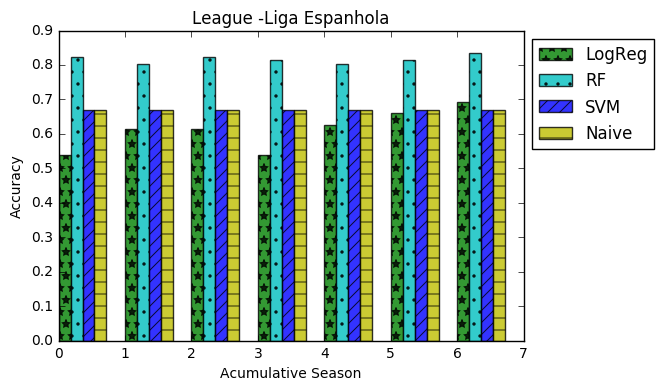

League - 1729
50
LogReg
[0.65384615384615385, 0.63461538461538458, 0.63461538461538458, 0.65384615384615385, 0.63461538461538458, 0.65384615384615385, 0.63461538461538458]
---
RF
[0.69230769230769229, 0.69230769230769229, 0.69230769230769229, 0.69230769230769229, 0.71153846153846156, 0.71153846153846156, 0.69230769230769229]
---
SVM
[0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385]
---
Naive
[0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385]


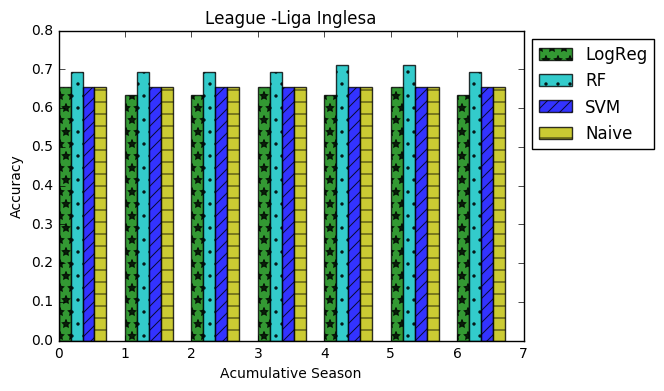

League - 4769
50
LogReg
[0.45652173913043476, 0.54347826086956519, 0.54347826086956519, 0.52173913043478259, 0.56521739130434778, 0.52173913043478259, 0.65217391304347827]
---
RF
[0.65217391304347827, 0.78260869565217395, 0.76086956521739135, 0.76086956521739135, 0.71739130434782605, 0.80434782608695654, 0.82608695652173914]
---
SVM
[0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308]
---
Naive
[0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308]


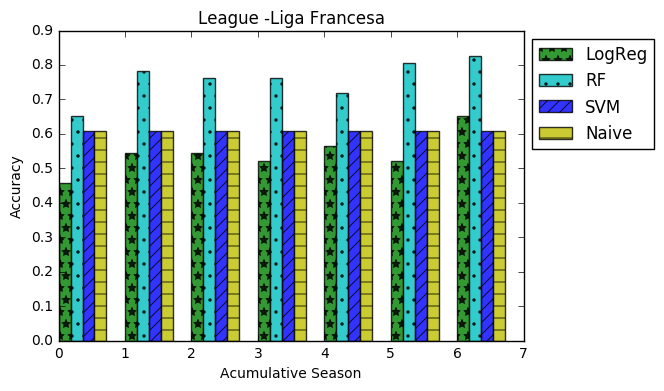

League - 10257
50
LogReg
[0.57352941176470584, 0.55882352941176472, 0.61764705882352944, 0.47058823529411764, 0.58823529411764708, 0.6470588235294118, 0.66176470588235292]
---
RF
[0.63235294117647056, 0.77941176470588236, 0.73529411764705888, 0.72058823529411764, 0.76470588235294112, 0.76470588235294112, 0.75]
---
SVM
[0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416]
---
Naive
[0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416]


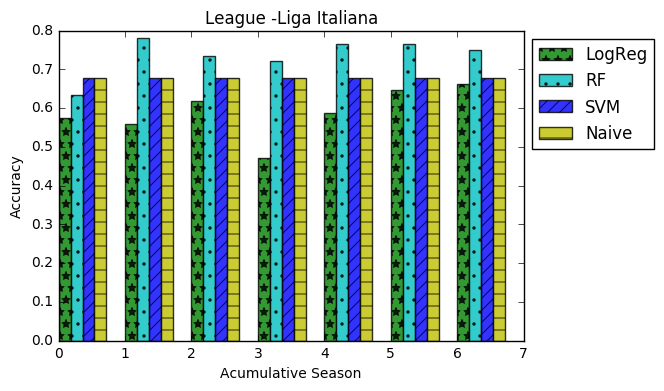

----F - K2----
League - 21518
0-1
50
1-2
3000
2-3
100
3-4
100
4-5
50
5-6
1000
LogReg
[0.55263157894736847, 0.6404494382022472, 0.44705882352941179, 0.63888888888888884, 0.6428571428571429, 0.61538461538461542]
---
RF
[0.71052631578947367, 0.7303370786516854, 0.82352941176470584, 0.72222222222222221, 0.82653061224489799, 0.8351648351648352]
---
SVM
[0.57894736842105265, 0.5280898876404494, 0.6705882352941176, 0.64814814814814814, 0.65306122448979587, 0.67032967032967028]
---
Naive
[0.57894736842105265, 0.5280898876404494, 0.6588235294117647, 0.64814814814814814, 0.65306122448979587, 0.67032967032967028]


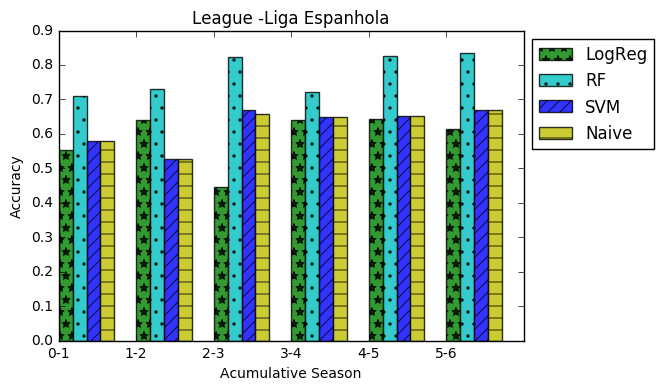

League - 1729
0-1
50
1-2
500
2-3
100
3-4
500
4-5
50
5-6
50
LogReg
[0.54545454545454541, 0.57471264367816088, 0.60526315789473684, 0.58227848101265822, 0.55072463768115942, 0.51923076923076927]
---
RF
[0.63636363636363635, 0.67816091954022983, 0.75, 0.77215189873417722, 0.76811594202898548, 0.69230769230769229]
---
SVM
[0.60606060606060608, 0.58620689655172409, 0.72368421052631582, 0.68354430379746833, 0.71014492753623193, 0.65384615384615385]
---
Naive
[0.60606060606060608, 0.58620689655172409, 0.72368421052631582, 0.68354430379746833, 0.71014492753623193, 0.65384615384615385]


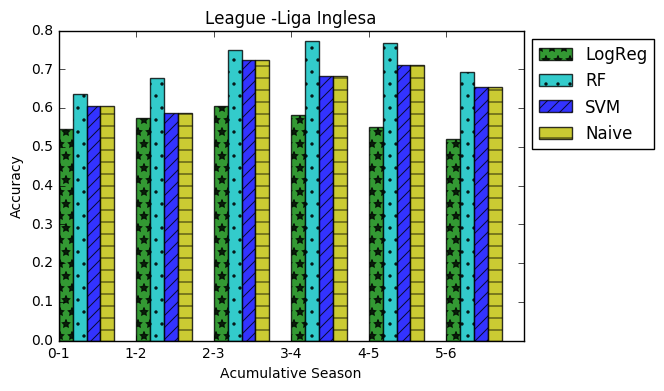

League - 4769
0-1
100
1-2
100
2-3
50
3-4
100
4-5
100
5-6
50
LogReg
[0.59523809523809523, 0.61904761904761907, 0.57999999999999996, 0.42372881355932202, 0.5625, 0.71739130434782605]
---
RF
[0.66666666666666663, 0.73809523809523814, 0.56000000000000005, 0.61016949152542377, 0.70833333333333337, 0.82608695652173914]
---
SVM
[0.66666666666666663, 0.7142857142857143, 0.59999999999999998, 0.66101694915254239, 0.66666666666666663, 0.60869565217391308]
---
Naive
[0.66666666666666663, 0.7142857142857143, 0.59999999999999998, 0.66101694915254239, 0.66666666666666663, 0.60869565217391308]


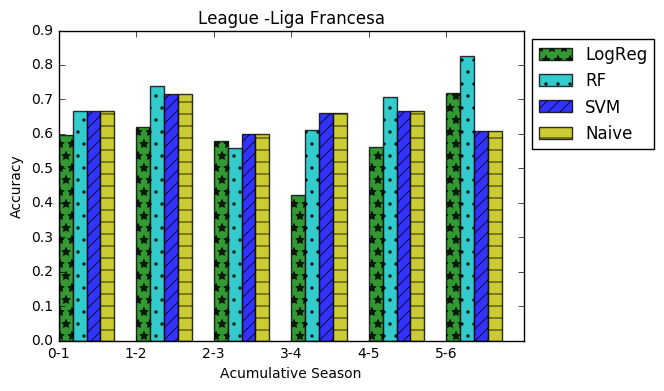

League - 10257
0-1
500
1-2
50
2-3
500
3-4
500
4-5
100
5-6
1000
LogReg
[0.51666666666666672, 0.48214285714285715, 0.62121212121212122, 0.52000000000000002, 0.52307692307692311, 0.63235294117647056]
---
RF
[0.69999999999999996, 0.625, 0.78787878787878785, 0.80000000000000004, 0.56923076923076921, 0.70588235294117652]
---
SVM
[0.65000000000000002, 0.5714285714285714, 0.71212121212121215, 0.69333333333333336, 0.55384615384615388, 0.67647058823529416]
---
Naive
[0.65000000000000002, 0.5714285714285714, 0.71212121212121215, 0.69333333333333336, 0.55384615384615388, 0.67647058823529416]


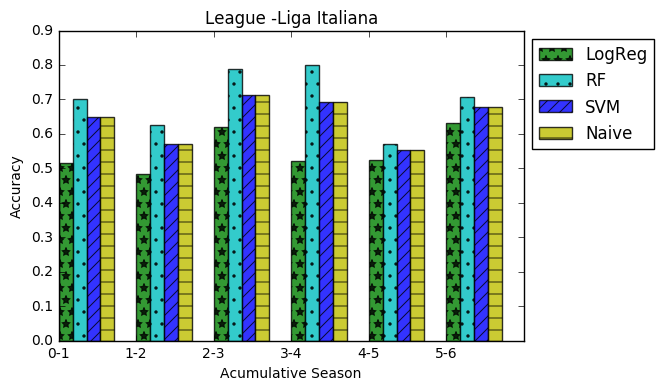

----F - K3----
League - 21518
0-2
100
1-3
1000
2-4
50
3-5
3000
4-6
1000
LogReg
[0.6741573033707865, 0.51764705882352946, 0.60185185185185186, 0.61224489795918369, 0.58241758241758246]
---
RF
[0.7191011235955056, 0.81176470588235294, 0.73148148148148151, 0.83673469387755106, 0.82417582417582413]
---
SVM
[0.5280898876404494, 0.6588235294117647, 0.64814814814814814, 0.65306122448979587, 0.67032967032967028]
---
Naive
[0.5280898876404494, 0.6588235294117647, 0.64814814814814814, 0.65306122448979587, 0.67032967032967028]


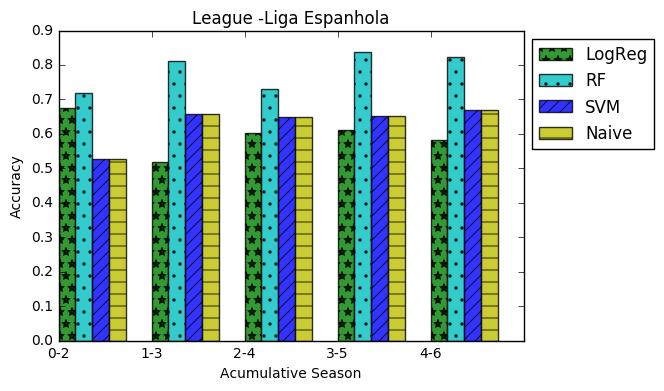

League - 1729
0-2
100
1-3
500
2-4
100
3-5
100
4-6
500
LogReg
[0.58620689655172409, 0.65789473684210531, 0.54430379746835444, 0.43478260869565216, 0.51923076923076927]
---
RF
[0.66666666666666663, 0.75, 0.77215189873417722, 0.76811594202898548, 0.69230769230769229]
---
SVM
[0.58620689655172409, 0.72368421052631582, 0.68354430379746833, 0.71014492753623193, 0.65384615384615385]
---
Naive
[0.58620689655172409, 0.72368421052631582, 0.68354430379746833, 0.71014492753623193, 0.65384615384615385]


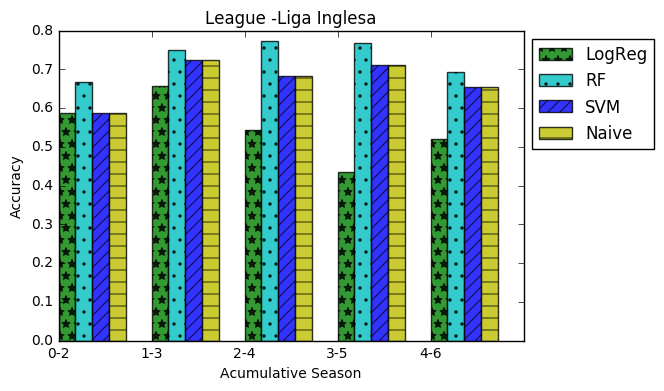

League - 4769
0-2
100
1-3
500
2-4
100
3-5
100
4-6
100
LogReg
[0.5714285714285714, 0.46000000000000002, 0.47457627118644069, 0.41666666666666669, 0.65217391304347827]
---
RF
[0.7142857142857143, 0.57999999999999996, 0.64406779661016944, 0.72916666666666663, 0.80434782608695654]
---
SVM
[0.7142857142857143, 0.59999999999999998, 0.66101694915254239, 0.66666666666666663, 0.60869565217391308]
---
Naive
[0.7142857142857143, 0.59999999999999998, 0.66101694915254239, 0.66666666666666663, 0.60869565217391308]


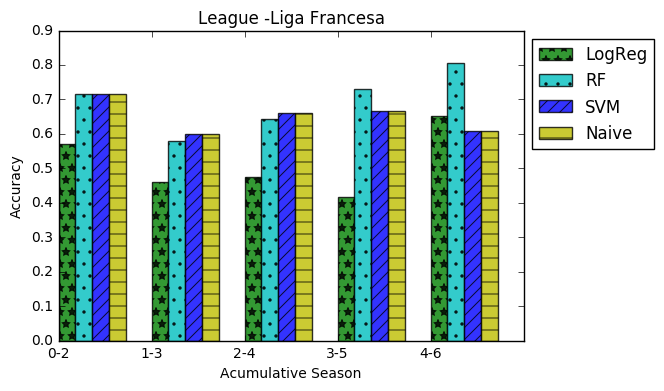

League - 10257
0-2
100
1-3
500
2-4
1000
3-5
100
4-6
100
LogReg
[0.39285714285714285, 0.5, 0.54666666666666663, 0.55384615384615388, 0.6029411764705882]
---
RF
[0.6428571428571429, 0.80303030303030298, 0.78666666666666663, 0.56923076923076921, 0.73529411764705888]
---
SVM
[0.5714285714285714, 0.71212121212121215, 0.69333333333333336, 0.55384615384615388, 0.67647058823529416]
---
Naive
[0.5714285714285714, 0.71212121212121215, 0.69333333333333336, 0.55384615384615388, 0.67647058823529416]


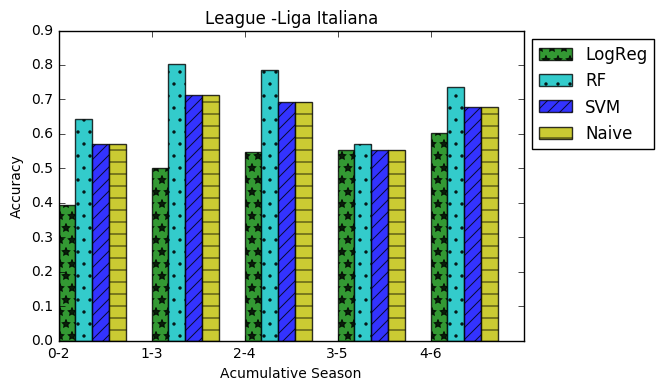

In [16]:
#Favoritos
print "----F - ACC----"
sf_rf_f1_ac = accumulative_f1(sf_data,leagues)
print "----F - K2----"
sf_rf_f1_k2 = k2_f2(sf_data,leagues)
print "----F - K3----"
sf_rf_f1_k3 = k3_f1(sf_data,leagues)


----F - ACC----
League - 21518


/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:55: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


3000
LogReg
[0.26751592356687898, 0.31847133757961782, 0.32484076433121017, 0.36942675159235666, 0.36942675159235666, 0.38216560509554143, 0.36942675159235666]
---
RF
[0.48407643312101911, 0.47770700636942676, 0.50318471337579618, 0.52229299363057324, 0.50955414012738853, 0.49681528662420382, 0.49044585987261147]
---
SVM
[0.47770700636942676, 0.4713375796178344, 0.47770700636942676, 0.47770700636942676, 0.4713375796178344, 0.4713375796178344, 0.4713375796178344]
---
Naive
[0.47770700636942676, 0.47770700636942676, 0.47770700636942676, 0.47770700636942676, 0.47770700636942676, 0.47770700636942676, 0.47770700636942676]


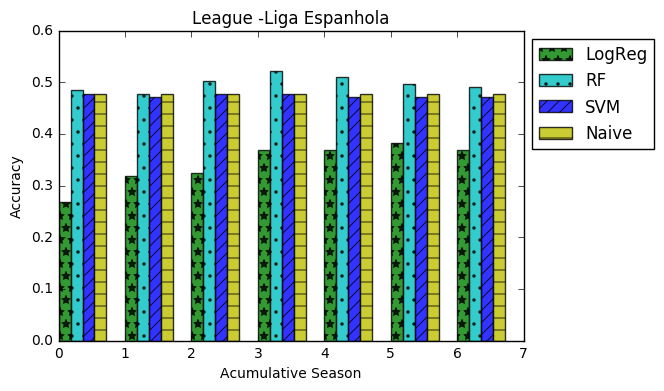

League - 1729
2000
LogReg
[0.44886363636363635, 0.39204545454545453, 0.44318181818181818, 0.39772727272727271, 0.39772727272727271, 0.38636363636363635, 0.4375]
---
RF
[0.48295454545454547, 0.46022727272727271, 0.47159090909090912, 0.47727272727272729, 0.47727272727272729, 0.48295454545454547, 0.47727272727272729]
---
SVM
[0.42613636363636365, 0.43181818181818182, 0.43181818181818182, 0.43181818181818182, 0.4375, 0.43181818181818182, 0.42613636363636365]
---
Naive
[0.43181818181818182, 0.43181818181818182, 0.43181818181818182, 0.43181818181818182, 0.43181818181818182, 0.43181818181818182, 0.43181818181818182]


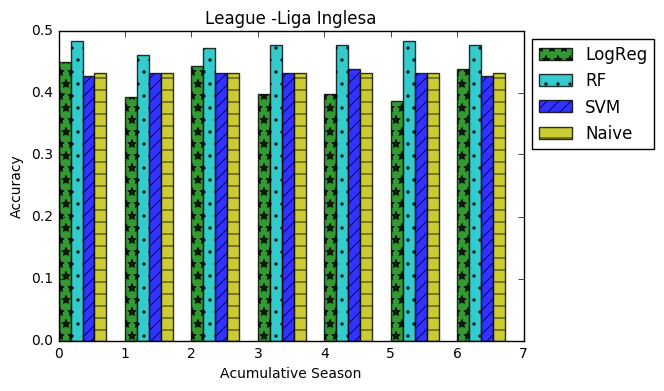

League - 4769
1000
LogReg
[0.3532934131736527, 0.3413173652694611, 0.3772455089820359, 0.38323353293413176, 0.3413173652694611, 0.39520958083832336, 0.40119760479041916]
---
RF
[0.40718562874251496, 0.45508982035928142, 0.40718562874251496, 0.44910179640718562, 0.44311377245508982, 0.44311377245508982, 0.45508982035928142]
---
SVM
[0.41916167664670656, 0.43113772455089822, 0.43113772455089822, 0.43712574850299402, 0.43113772455089822, 0.43712574850299402, 0.43712574850299402]
---
Naive
[0.43712574850299402, 0.43712574850299402, 0.43712574850299402, 0.43712574850299402, 0.43712574850299402, 0.43712574850299402, 0.43712574850299402]


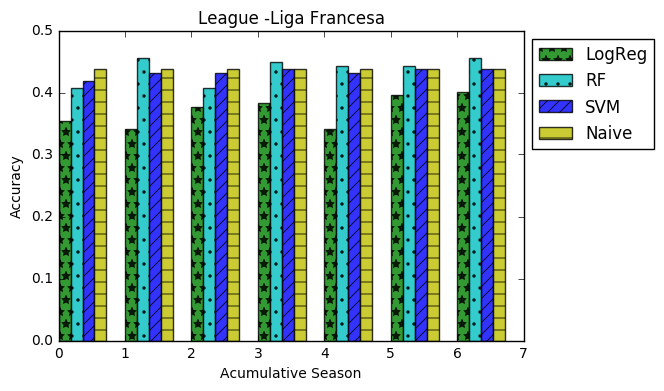

League - 10257
100
LogReg
[0.42937853107344631, 0.40677966101694918, 0.41807909604519772, 0.42372881355932202, 0.4463276836158192, 0.43502824858757061, 0.40112994350282488]
---
RF
[0.48022598870056499, 0.47457627118644069, 0.48587570621468928, 0.47457627118644069, 0.50282485875706218, 0.49717514124293788, 0.50282485875706218]
---
SVM
[0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.40112994350282488, 0.40112994350282488]
---
Naive
[0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.39548022598870058]


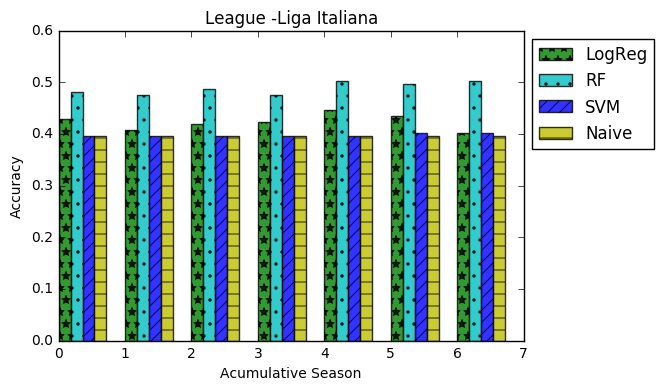

----F - K2----
League - 21518
0-1
500
1-2
500
2-3
2000
3-4
100
4-5
2000
5-6
1000
LogReg
[0.27567567567567569, 0.40259740259740262, 0.35999999999999999, 0.34615384615384615, 0.31168831168831168, 0.32484076433121017]
---
RF
[0.54594594594594592, 0.5, 0.42285714285714288, 0.45512820512820512, 0.43506493506493504, 0.46496815286624205]
---
SVM
[0.55675675675675673, 0.4935064935064935, 0.43428571428571427, 0.41666666666666669, 0.38311688311688313, 0.46496815286624205]
---
Naive
[0.55675675675675673, 0.4935064935064935, 0.43428571428571427, 0.41666666666666669, 0.36363636363636365, 0.47770700636942676]


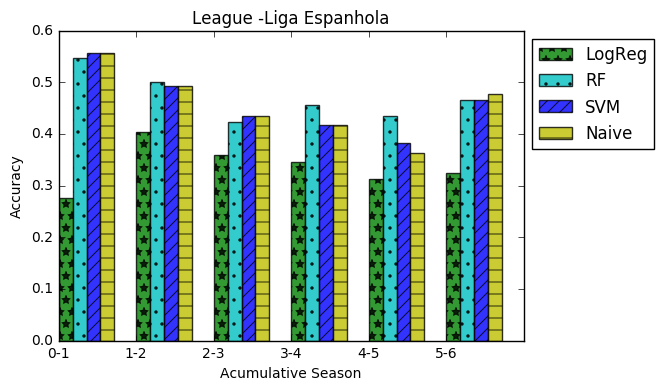

League - 1729
0-1
100
1-2
500
2-3
100
3-4
50
4-5
1000
5-6
50
LogReg
[0.35714285714285715, 0.35502958579881655, 0.42528735632183906, 0.33950617283950618, 0.42261904761904762, 0.38636363636363635]
---
RF
[0.48351648351648352, 0.42603550295857989, 0.43103448275862066, 0.5, 0.45833333333333331, 0.46022727272727271]
---
SVM
[0.46153846153846156, 0.46153846153846156, 0.36781609195402298, 0.41358024691358025, 0.42857142857142855, 0.42613636363636365]
---
Naive
[0.46153846153846156, 0.46153846153846156, 0.36781609195402298, 0.41358024691358025, 0.43452380952380953, 0.43181818181818182]


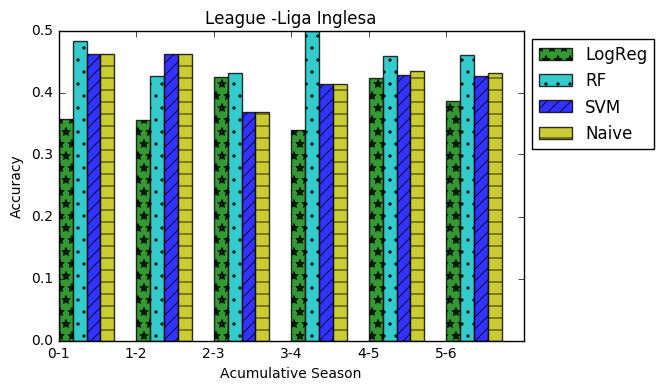

League - 4769
0-1
100
1-2
1000
2-3
100
3-4
2000
4-5
50
5-6
2000
LogReg
[0.37948717948717947, 0.40588235294117647, 0.35195530726256985, 0.37640449438202245, 0.36931818181818182, 0.46706586826347307]
---
RF
[0.39487179487179486, 0.42941176470588233, 0.46927374301675978, 0.42134831460674155, 0.46590909090909088, 0.43113772455089822]
---
SVM
[0.39487179487179486, 0.5, 0.46927374301675978, 0.42134831460674155, 0.46022727272727271, 0.43712574850299402]
---
Naive
[0.38974358974358975, 0.49411764705882355, 0.46927374301675978, 0.4157303370786517, 0.47159090909090912, 0.43712574850299402]


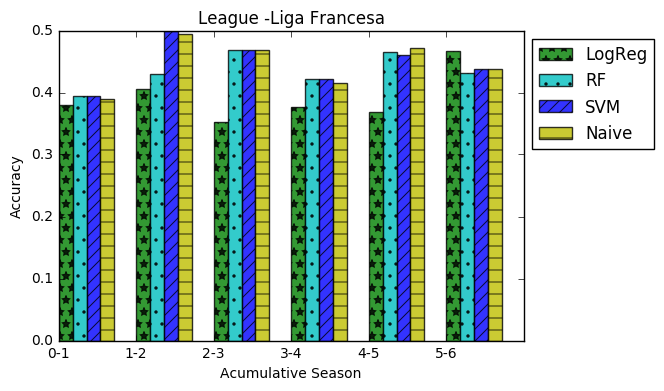

League - 10257
0-1
3000
1-2
50
2-3
50
3-4
50
4-5
50
5-6
50
LogReg
[0.36363636363636365, 0.40259740259740262, 0.38953488372093026, 0.38596491228070173, 0.34682080924855491, 0.33333333333333331]
---
RF
[0.52121212121212124, 0.50649350649350644, 0.43023255813953487, 0.43859649122807015, 0.38728323699421963, 0.39548022598870058]
---
SVM
[0.49090909090909091, 0.46103896103896103, 0.41279069767441862, 0.44444444444444442, 0.41618497109826591, 0.39548022598870058]
---
Naive
[0.49090909090909091, 0.46103896103896103, 0.41279069767441862, 0.44444444444444442, 0.41618497109826591, 0.39548022598870058]


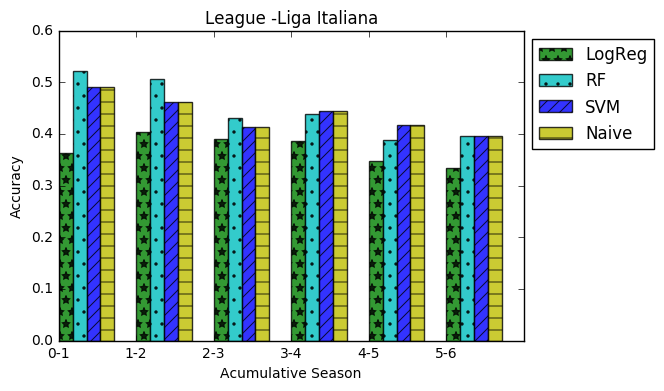

----F - K3----
League - 21518
0-2
100
1-3
100
2-4
2000
3-5
100
4-6
100
LogReg
[0.38961038961038963, 0.40571428571428569, 0.37179487179487181, 0.31818181818181818, 0.3503184713375796]
---
RF
[0.5, 0.44571428571428573, 0.4358974358974359, 0.44155844155844154, 0.45859872611464969]
---
SVM
[0.4935064935064935, 0.43428571428571427, 0.41666666666666669, 0.37662337662337664, 0.46496815286624205]
---
Naive
[0.4935064935064935, 0.43428571428571427, 0.41666666666666669, 0.36363636363636365, 0.47770700636942676]


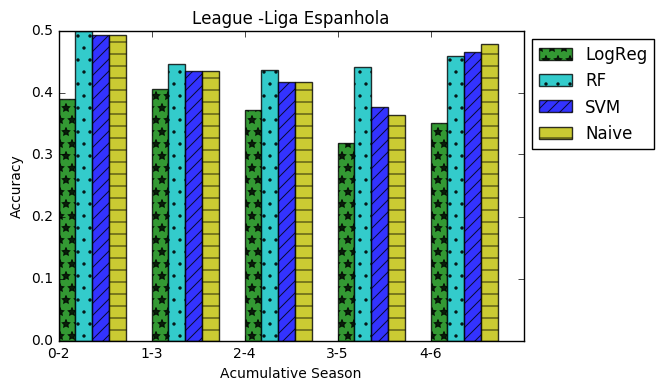

League - 1729
0-2
2000
1-3
1000
2-4
3000
3-5
3000
4-6
50
LogReg
[0.36686390532544377, 0.40229885057471265, 0.33950617283950618, 0.48809523809523808, 0.36931818181818182]
---
RF
[0.44970414201183434, 0.41954022988505746, 0.50617283950617287, 0.48214285714285715, 0.47727272727272729]
---
SVM
[0.46153846153846156, 0.36781609195402298, 0.40740740740740738, 0.41666666666666669, 0.43181818181818182]
---
Naive
[0.46153846153846156, 0.36781609195402298, 0.41358024691358025, 0.43452380952380953, 0.43181818181818182]


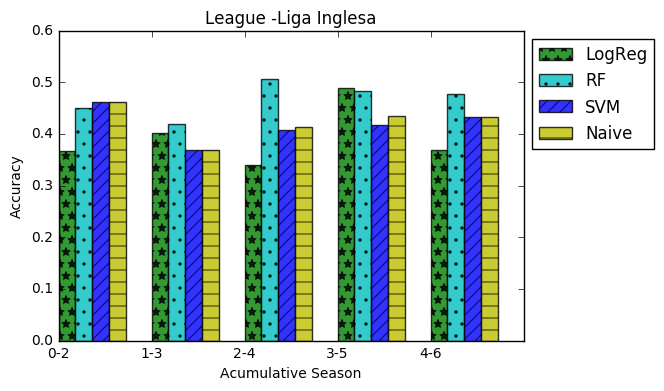

League - 4769
0-2
500
1-3
1000
2-4
1000
3-5
1000
4-6
50
LogReg
[0.36470588235294116, 0.39664804469273746, 0.33707865168539325, 0.39204545454545453, 0.45508982035928142]
---
RF
[0.44117647058823528, 0.46368715083798884, 0.4157303370786517, 0.47727272727272729, 0.41916167664670656]
---
SVM
[0.50588235294117645, 0.46927374301675978, 0.4157303370786517, 0.45454545454545453, 0.43113772455089822]
---
Naive
[0.49411764705882355, 0.46927374301675978, 0.4157303370786517, 0.47159090909090912, 0.43712574850299402]


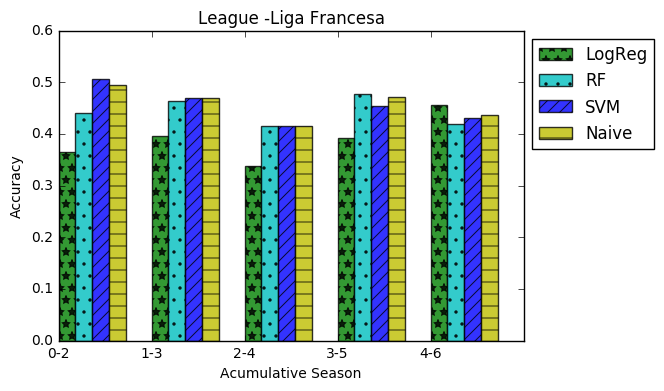

League - 10257
0-2
1000
1-3
1000
2-4
3000
3-5
50
4-6
2000
LogReg
[0.40909090909090912, 0.38953488372093026, 0.39766081871345027, 0.41040462427745666, 0.33898305084745761]
---
RF
[0.50649350649350644, 0.48255813953488375, 0.46198830409356723, 0.43352601156069365, 0.49717514124293788]
---
SVM
[0.46103896103896103, 0.41279069767441862, 0.44444444444444442, 0.41618497109826591, 0.39548022598870058]
---
Naive
[0.46103896103896103, 0.41279069767441862, 0.44444444444444442, 0.41618497109826591, 0.39548022598870058]


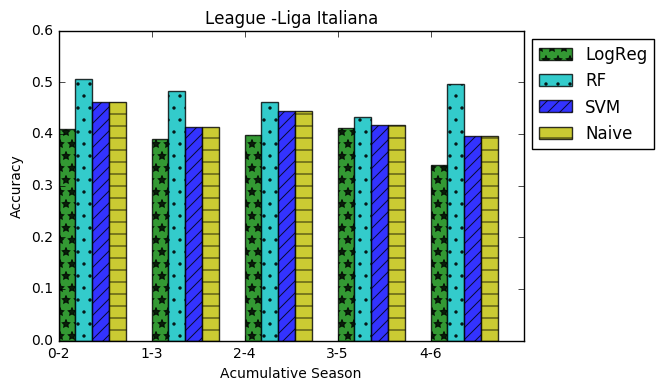

In [17]:
#Favoritos
print "----F - ACC----"
f_rf_f1_ac = accumulative_f1(f_data,leagues)
print "----F - K2----"
f_rf_f1_k2 = k2_f1(f_data,leagues)
print "----F - K3----"
f_rf_f1_k3 = k3_f1(f_data,leagues)


----EQ - ACC----
League - 21518


/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:55: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


50
LogReg
[0.3902439024390244, 0.3048780487804878, 0.32926829268292684, 0.37804878048780488, 0.34146341463414637, 0.40243902439024393, 0.40243902439024393]
---
RF
[0.43902439024390244, 0.42682926829268292, 0.37804878048780488, 0.40243902439024393, 0.37804878048780488, 0.40243902439024393, 0.36585365853658536]
---
SVM
[0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583]
---
Naive
[0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583]


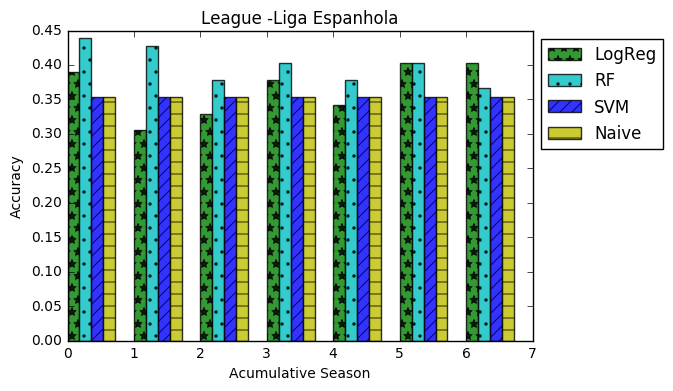

League - 1729
100
LogReg
[0.30392156862745096, 0.26470588235294118, 0.38235294117647056, 0.36274509803921567, 0.39215686274509803, 0.39215686274509803, 0.40196078431372551]
---
RF
[0.25490196078431371, 0.30392156862745096, 0.29411764705882354, 0.3235294117647059, 0.30392156862745096, 0.37254901960784315, 0.42156862745098039]
---
SVM
[0.29411764705882354, 0.28431372549019607, 0.30392156862745096, 0.29411764705882354, 0.30392156862745096, 0.30392156862745096, 0.27450980392156865]
---
Naive
[0.30392156862745096, 0.30392156862745096, 0.30392156862745096, 0.30392156862745096, 0.30392156862745096, 0.30392156862745096, 0.30392156862745096]


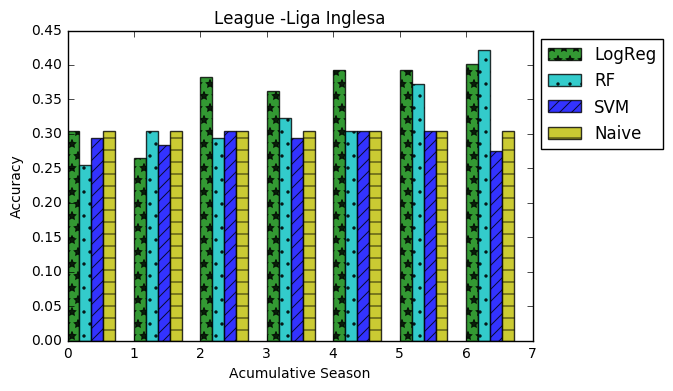

League - 4769
500
LogReg
[0.34482758620689657, 0.27586206896551724, 0.29310344827586204, 0.35344827586206895, 0.35344827586206895, 0.35344827586206895, 0.31896551724137934]
---
RF
[0.32758620689655171, 0.31896551724137934, 0.31034482758620691, 0.28448275862068967, 0.31034482758620691, 0.29310344827586204, 0.31896551724137934]
---
SVM
[0.29310344827586204, 0.31896551724137934, 0.31034482758620691, 0.31034482758620691, 0.31034482758620691, 0.34482758620689657, 0.31896551724137934]
---
Naive
[0.29310344827586204, 0.34482758620689657, 0.34482758620689657, 0.34482758620689657, 0.34482758620689657, 0.34482758620689657, 0.34482758620689657]


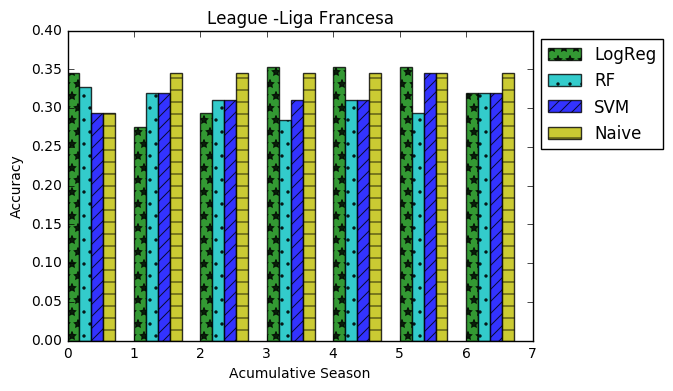

League - 10257
100
LogReg
[0.38823529411764707, 0.37647058823529411, 0.44705882352941179, 0.40000000000000002, 0.36470588235294116, 0.40000000000000002, 0.42352941176470588]
---
RF
[0.47058823529411764, 0.40000000000000002, 0.42352941176470588, 0.42352941176470588, 0.45882352941176469, 0.45882352941176469, 0.44705882352941179]
---
SVM
[0.40000000000000002, 0.40000000000000002, 0.38823529411764707, 0.40000000000000002, 0.38823529411764707, 0.37647058823529411, 0.36470588235294116]
---
Naive
[0.40000000000000002, 0.40000000000000002, 0.40000000000000002, 0.40000000000000002, 0.40000000000000002, 0.40000000000000002, 0.40000000000000002]


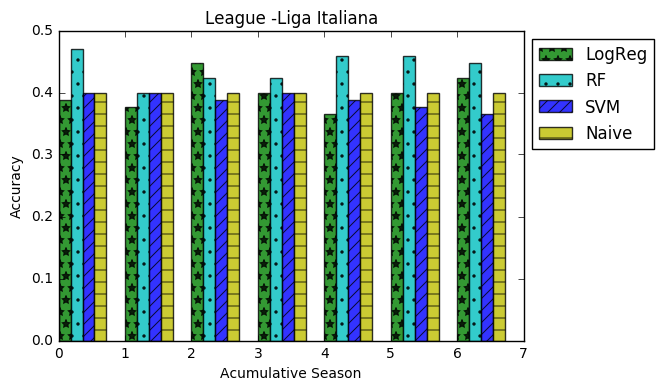

----EQ - K2----
League - 21518
0-1
50
1-2
1000
2-3
3000
3-4
3000
4-5
1000
5-6
1000
LogReg
[0.3188405797101449, 0.40229885057471265, 0.31428571428571428, 0.37878787878787878, 0.35897435897435898, 0.32926829268292684]
---
RF
[0.46376811594202899, 0.45977011494252873, 0.40000000000000002, 0.36363636363636365, 0.37179487179487181, 0.43902439024390244]
---
SVM
[0.43478260869565216, 0.45977011494252873, 0.42857142857142855, 0.34848484848484851, 0.38461538461538464, 0.34146341463414637]
---
Naive
[0.43478260869565216, 0.45977011494252873, 0.42857142857142855, 0.34848484848484851, 0.38461538461538464, 0.35365853658536583]


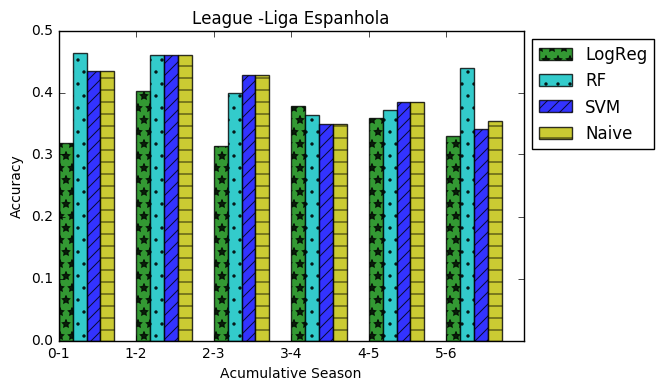

League - 1729
0-1
100
1-2
100
2-3
1000
3-4
2000
4-5
100
5-6
100
LogReg
[0.35365853658536583, 0.41891891891891891, 0.3125, 0.3595505617977528, 0.32258064516129031, 0.33333333333333331]
---
RF
[0.3048780487804878, 0.36486486486486486, 0.41249999999999998, 0.39325842696629215, 0.35483870967741937, 0.38235294117647056]
---
SVM
[0.40243902439024393, 0.28378378378378377, 0.3125, 0.3146067415730337, 0.37634408602150538, 0.29411764705882354]
---
Naive
[0.40243902439024393, 0.29729729729729731, 0.29999999999999999, 0.29213483146067415, 0.38709677419354838, 0.30392156862745096]


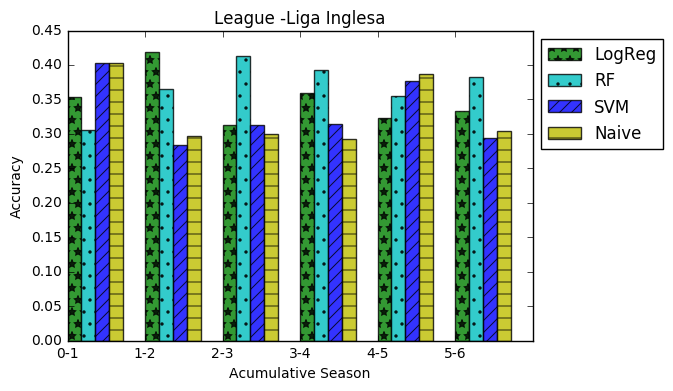

League - 4769
0-1
100
1-2
100
2-3
500
3-4
100
4-5
1000
5-6
50
LogReg
[0.30434782608695654, 0.33898305084745761, 0.29702970297029702, 0.30107526881720431, 0.31132075471698112, 0.29310344827586204]
---
RF
[0.34782608695652173, 0.34745762711864409, 0.30693069306930693, 0.40860215053763443, 0.3867924528301887, 0.31034482758620691]
---
SVM
[0.35869565217391303, 0.40677966101694918, 0.32673267326732675, 0.33333333333333331, 0.32075471698113206, 0.36206896551724138]
---
Naive
[0.38043478260869568, 0.40677966101694918, 0.33663366336633666, 0.34408602150537637, 0.330188679245283, 0.34482758620689657]


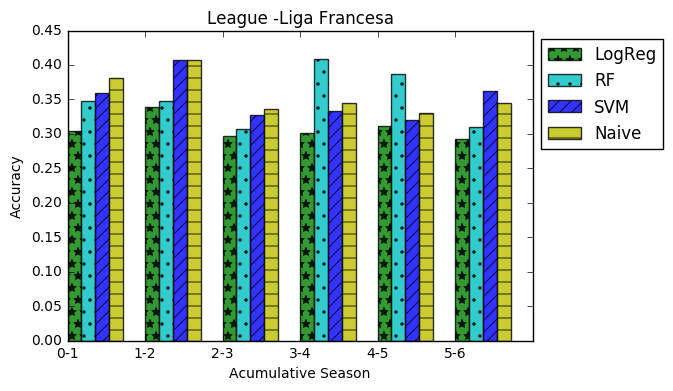

League - 10257
0-1
500
1-2
500
2-3
500
3-4
500
4-5
50
5-6
3000
LogReg
[0.3235294117647059, 0.3473684210526316, 0.40659340659340659, 0.38095238095238093, 0.4175824175824176, 0.36470588235294116]
---
RF
[0.34313725490196079, 0.47368421052631576, 0.39560439560439559, 0.40476190476190477, 0.36263736263736263, 0.32941176470588235]
---
SVM
[0.33333333333333331, 0.40000000000000002, 0.39560439560439559, 0.35714285714285715, 0.27472527472527475, 0.29411764705882354]
---
Naive
[0.34313725490196079, 0.41052631578947368, 0.4175824175824176, 0.35714285714285715, 0.2967032967032967, 0.30588235294117649]


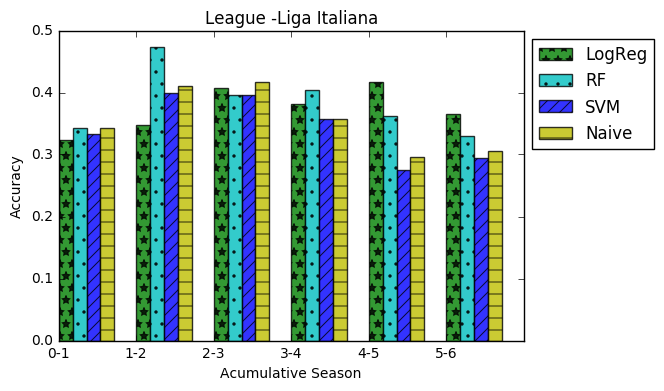

----EQ - K3----
League - 21518
0-2
50
1-3
1000
2-4
1000
3-5
100
4-6
1000
LogReg
[0.33333333333333331, 0.38571428571428573, 0.36363636363636365, 0.35897435897435898, 0.37804878048780488]
---
RF
[0.37931034482758619, 0.41428571428571431, 0.34848484848484851, 0.33333333333333331, 0.37804878048780488]
---
SVM
[0.45977011494252873, 0.42857142857142855, 0.34848484848484851, 0.38461538461538464, 0.35365853658536583]
---
Naive
[0.45977011494252873, 0.42857142857142855, 0.34848484848484851, 0.38461538461538464, 0.35365853658536583]


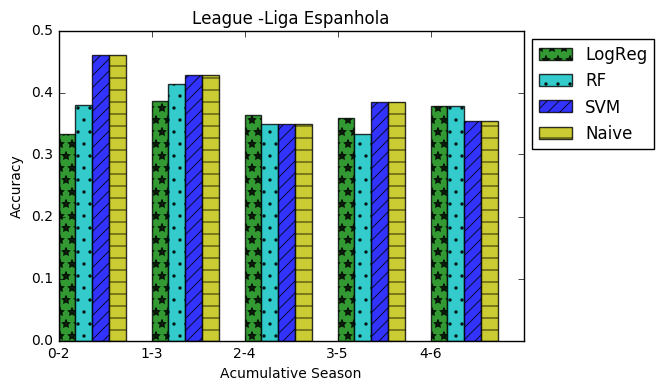

League - 1729
0-2
50
1-3
1000
2-4
100
3-5
2000
4-6
1000
LogReg
[0.35135135135135137, 0.29999999999999999, 0.38202247191011235, 0.37634408602150538, 0.33333333333333331]
---
RF
[0.33783783783783783, 0.40000000000000002, 0.38202247191011235, 0.35483870967741937, 0.47058823529411764]
---
SVM
[0.28378378378378377, 0.29999999999999999, 0.29213483146067415, 0.37634408602150538, 0.3235294117647059]
---
Naive
[0.29729729729729731, 0.29999999999999999, 0.29213483146067415, 0.38709677419354838, 0.30392156862745096]


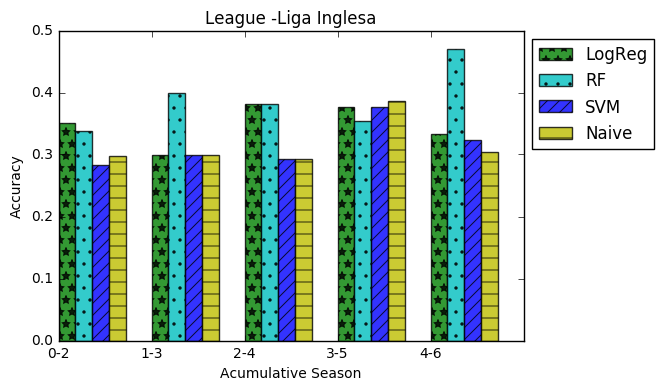

League - 4769
0-2
100
1-3
50
2-4
500
3-5
1000
4-6
50
LogReg
[0.33898305084745761, 0.27722772277227725, 0.29032258064516131, 0.30188679245283018, 0.31034482758620691]
---
RF
[0.40677966101694918, 0.37623762376237624, 0.33333333333333331, 0.37735849056603776, 0.37068965517241381]
---
SVM
[0.40677966101694918, 0.32673267326732675, 0.32258064516129031, 0.39622641509433965, 0.35344827586206895]
---
Naive
[0.40677966101694918, 0.33663366336633666, 0.34408602150537637, 0.3867924528301887, 0.34482758620689657]


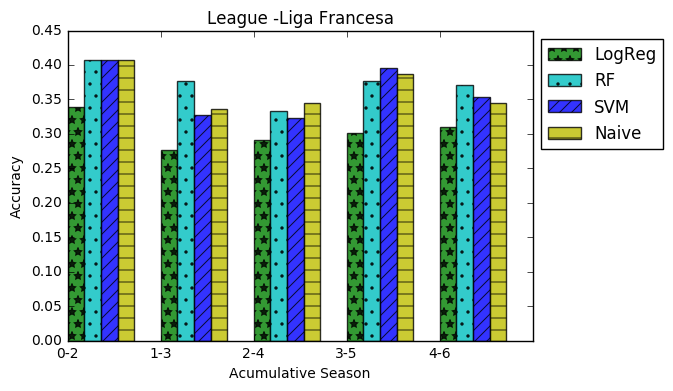

League - 10257
0-2
2000
1-3
1000
2-4
100
3-5
100
4-6
1000
LogReg
[0.32631578947368423, 0.39560439560439559, 0.42857142857142855, 0.30769230769230771, 0.3411764705882353]
---
RF
[0.45263157894736844, 0.4175824175824176, 0.42857142857142855, 0.40659340659340659, 0.40000000000000002]
---
SVM
[0.41052631578947368, 0.4175824175824176, 0.35714285714285715, 0.2857142857142857, 0.38823529411764707]
---
Naive
[0.41052631578947368, 0.4175824175824176, 0.35714285714285715, 0.2967032967032967, 0.40000000000000002]


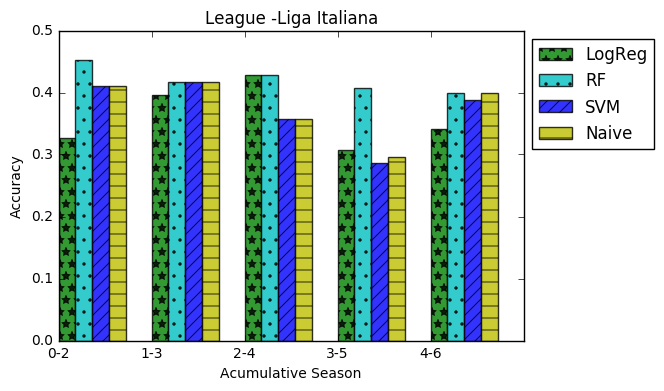

In [18]:
#Iguais
print "----EQ - ACC----"
eq_rf_f1_ac = accumulative_f1(eq_data,leagues)
print "----EQ - K2----"
eq_rf_f1_k2 = k2_f1(eq_data,leagues)
print "----EQ - K3----"
eq_rf_f1_k3 = k3_f1(eq_data,leagues)

In [19]:
#Salvando rf's em arquivo

import pickle

#sf
f = open('sf_rf_acc_ac.pckl', 'wb')
pickle.dump(sf_rf_acc_ac, f)
f.close()

f = open('sf_rf_acc_k2.pckl', 'wb')
pickle.dump(sf_rf_acc_k2, f)
f.close()

f = open('sf_rf_acc_k3.pckl', 'wb')
pickle.dump(sf_rf_acc_k3, f)
f.close()

f = open('sf_rf_f1_ac.pckl', 'wb')
pickle.dump(sf_rf_f1_ac, f)
f.close()

f = open('sf_rf_f1_k2.pckl', 'wb')
pickle.dump(sf_rf_f1_k2, f)
f.close()

f = open('sf_rf_f1_k3.pckl', 'wb')
pickle.dump(sf_rf_f1_k3, f)
f.close()


#Favorito

f = open('f_rf_acc_ac.pckl', 'wb')
pickle.dump(f_rf_acc_ac, f)
f.close()

f = open('f_rf_acc_k2.pckl', 'wb')
pickle.dump(f_rf_acc_k2, f)
f.close()

f = open('f_rf_acc_k3.pckl', 'wb')
pickle.dump(f_rf_acc_k3, f)
f.close()

f = open('f_rf_f1_ac.pckl', 'wb')
pickle.dump(f_rf_f1_ac, f)
f.close()

f = open('f_rf_f1_k2.pckl', 'wb')
pickle.dump(f_rf_f1_k2, f)
f.close()

f = open('f_rf_f1_k3.pckl', 'wb')
pickle.dump(f_rf_f1_k3, f)
f.close()


#Igual

f = open('eq_rf_acc_ac.pckl', 'wb')
pickle.dump(eq_rf_acc_ac, f)
f.close()

f = open('eq_rf_acc_k2.pckl', 'wb')
pickle.dump(eq_rf_acc_k2, f)
f.close()

f = open('eq_rf_acc_k3.pckl', 'wb')
pickle.dump(eq_rf_acc_k3, f)
f.close()

f = open('eq_rf_f1_ac.pckl', 'wb')
pickle.dump(eq_rf_f1_ac, f)
f.close()

f = open('eq_rf_f1_k2.pckl', 'wb')
pickle.dump(eq_rf_f1_k2, f)
f.close()

f = open('eq_rf_f1_k3.pckl', 'wb')
pickle.dump(eq_rf_f1_k3, f)
f.close()

#Carregar arquivo
#f = open('store.pckl', 'rb')
#obj = pickle.load(f)
#f.close()

In [20]:
#Função que vai chamar sem usar a separação por filtro
ft=[u'hg_V', u'hg_D', u'hg_E', u'hg_GF', u'hg_AVG_GF', u'hg_GS',
       u'hg_AVG_GS', u'hg_J1GS', u'hg_J1GF', u'hg_BTTS', u'hg_Over2',
       u'hg_Over3', u'hg_Over4', u'hg_WinningCleanSheet', u'hg_LosingFS',
       u'hg_FailedScore', u'hg_CleanSheet', u'hg_AVG_GOALS', u'hgc_V',
       u'hgc_D', u'hgc_E', u'hgc_GF', u'hgc_AVG_GF', u'hgc_GS',
       u'hgc_AVG_GS', u'hgc_J1GS', u'hgc_J1GF', u'hgc_BTTS', u'hgc_Over2',
       u'hgc_Over3', u'hgc_Over4', u'hgc_WinningCleanSheet',
       u'hgc_LosingFS', u'hgc_FailedScore', u'hgc_CleanSheet',
       u'hgc_AVG_GOALS', u'hl_V', u'hl_D', u'hl_E', u'hl_GF', u'hl_AVG_GF',
       u'hl_GS', u'hl_AVG_GS', u'hl_J1GS', u'hl_J1GF', u'hl_BTTS',
       u'hl_Over2', u'hl_Over3', u'hl_Over4', u'hl_WinningCleanSheet',
       u'hl_LosingFS', u'hl_FailedScore', u'hl_CleanSheet',
       u'hl_AVG_GOALS', u'hlc_V', u'hlc_D', u'hlc_E', u'hlc_GF',
       u'hlc_AVG_GF', u'hlc_GS', u'hlc_AVG_GS', u'hlc_J1GS', u'hlc_J1GF',
       u'hlc_BTTS', u'hlc_Over2', u'hlc_Over3', u'hlc_Over4',
       u'hlc_WinningCleanSheet', u'hlc_LosingFS', u'hlc_FailedScore',
       u'hlc_CleanSheet', u'hlc_AVG_GOALS', u'ag_V', u'ag_D', u'ag_E',
       u'ag_GF', u'ag_AVG_GF', u'ag_GS', u'ag_AVG_GS', u'ag_J1GS',
       u'ag_J1GF', u'ag_BTTS', u'ag_Over2', u'ag_Over3', u'ag_Over4',
       u'ag_WinningCleanSheet', u'ag_LosingFS', u'ag_FailedScore',
       u'ag_CleanSheet', u'ag_AVG_GOALS', u'agc_V', u'agc_D', u'agc_E',
       u'agc_GF', u'agc_AVG_GF', u'agc_GS', u'agc_AVG_GS', u'agc_J1GS',
       u'agc_J1GF', u'agc_BTTS', u'agc_Over2', u'agc_Over3', u'agc_Over4',
       u'agc_WinningCleanSheet', u'agc_LosingFS', u'agc_FailedScore',
       u'agc_CleanSheet', u'agc_AVG_GOALS', u'al_V', u'al_D', u'al_E',
       u'al_GF', u'al_AVG_GF', u'al_GS', u'al_AVG_GS', u'al_J1GS',
       u'al_J1GF', u'al_BTTS', u'al_Over2', u'al_Over3', u'al_Over4',
       u'al_WinningCleanSheet', u'al_LosingFS', u'al_FailedScore',
       u'al_CleanSheet', u'al_AVG_GOALS', u'alc_V', u'alc_D', u'alc_E',
       u'alc_GF', u'alc_AVG_GF', u'alc_GS', u'alc_AVG_GS', u'alc_J1GS',
       u'alc_J1GF', u'alc_BTTS', u'alc_Over2', u'alc_Over3', u'alc_Over4',
       u'alc_WinningCleanSheet', u'alc_LosingFS', u'alc_FailedScore',
       u'alc_CleanSheet', u'alc_AVG_GOALS', u'ga_rank_def', u'ga_rank_atk',
       u'gh_rank_def', u'gh_rank_atk', u'la_rank_def', u'la_rank_atk',
       u'lh_rank_def', u'lh_rank_atk', u'a_date', u'h_date', u'stage','B365H',
       'B365D', 'B365A']
print "----AL - ACC----"
al_rf_acc_ac = accumulative_acc(data,leagues)
print "----AL - K2----"
al_rf_acc_k2 = k2_acc(data,leagues)
print "----AL - K3----"
al_rf_acc_k3 = k3_acc(data,leagues)
print "----AL - f1 ACC----"
al_rf_f1_ac = accumulative_f1(data,leagues)
print "----AL - f1 K2----"
al_rf_f1_k2 = k2_f2(data,leagues)
print "----AL - f1 K3----"
al_rf_f1_k3 = k3_f3(data,leagues)


In [22]:
#teste da Filtragem com os dados da temporada 7
ft=[u'hg_V', u'hg_D', u'hg_E', u'hg_GF', u'hg_AVG_GF', u'hg_GS',
       u'hg_AVG_GS', u'hg_J1GS', u'hg_J1GF', u'hg_BTTS', u'hg_Over2',
       u'hg_Over3', u'hg_Over4', u'hg_WinningCleanSheet', u'hg_LosingFS',
       u'hg_FailedScore', u'hg_CleanSheet', u'hg_AVG_GOALS', u'hgc_V',
       u'hgc_D', u'hgc_E', u'hgc_GF', u'hgc_AVG_GF', u'hgc_GS',
       u'hgc_AVG_GS', u'hgc_J1GS', u'hgc_J1GF', u'hgc_BTTS', u'hgc_Over2',
       u'hgc_Over3', u'hgc_Over4', u'hgc_WinningCleanSheet',
       u'hgc_LosingFS', u'hgc_FailedScore', u'hgc_CleanSheet',
       u'hgc_AVG_GOALS', u'hl_V', u'hl_D', u'hl_E', u'hl_GF', u'hl_AVG_GF',
       u'hl_GS', u'hl_AVG_GS', u'hl_J1GS', u'hl_J1GF', u'hl_BTTS',
       u'hl_Over2', u'hl_Over3', u'hl_Over4', u'hl_WinningCleanSheet',
       u'hl_LosingFS', u'hl_FailedScore', u'hl_CleanSheet',
       u'hl_AVG_GOALS', u'hlc_V', u'hlc_D', u'hlc_E', u'hlc_GF',
       u'hlc_AVG_GF', u'hlc_GS', u'hlc_AVG_GS', u'hlc_J1GS', u'hlc_J1GF',
       u'hlc_BTTS', u'hlc_Over2', u'hlc_Over3', u'hlc_Over4',
       u'hlc_WinningCleanSheet', u'hlc_LosingFS', u'hlc_FailedScore',
       u'hlc_CleanSheet', u'hlc_AVG_GOALS', u'ag_V', u'ag_D', u'ag_E',
       u'ag_GF', u'ag_AVG_GF', u'ag_GS', u'ag_AVG_GS', u'ag_J1GS',
       u'ag_J1GF', u'ag_BTTS', u'ag_Over2', u'ag_Over3', u'ag_Over4',
       u'ag_WinningCleanSheet', u'ag_LosingFS', u'ag_FailedScore',
       u'ag_CleanSheet', u'ag_AVG_GOALS', u'agc_V', u'agc_D', u'agc_E',
       u'agc_GF', u'agc_AVG_GF', u'agc_GS', u'agc_AVG_GS', u'agc_J1GS',
       u'agc_J1GF', u'agc_BTTS', u'agc_Over2', u'agc_Over3', u'agc_Over4',
       u'agc_WinningCleanSheet', u'agc_LosingFS', u'agc_FailedScore',
       u'agc_CleanSheet', u'agc_AVG_GOALS', u'al_V', u'al_D', u'al_E',
       u'al_GF', u'al_AVG_GF', u'al_GS', u'al_AVG_GS', u'al_J1GS',
       u'al_J1GF', u'al_BTTS', u'al_Over2', u'al_Over3', u'al_Over4',
       u'al_WinningCleanSheet', u'al_LosingFS', u'al_FailedScore',
       u'al_CleanSheet', u'al_AVG_GOALS', u'alc_V', u'alc_D', u'alc_E',
       u'alc_GF', u'alc_AVG_GF', u'alc_GS', u'alc_AVG_GS', u'alc_J1GS',
       u'alc_J1GF', u'alc_BTTS', u'alc_Over2', u'alc_Over3', u'alc_Over4',
       u'alc_WinningCleanSheet', u'alc_LosingFS', u'alc_FailedScore',
       u'alc_CleanSheet', u'alc_AVG_GOALS', u'ga_rank_def', u'ga_rank_atk',
       u'gh_rank_def', u'gh_rank_atk', u'la_rank_def', u'la_rank_atk',
       u'lh_rank_def', u'lh_rank_atk', u'a_date', u'h_date', u'stage']
sf_train = sf_data[sf_data['season']<=6]
sf_test = sf_data[sf_data['season']>6]
sf_rf_score,sf_rf_estimator,sf_rf_max = setRF(sf_train[ft],sf_train['Output'],sf_test[ft],sf_test['Output'])

f_train = f_data[f_data['season']<=6]
f_test = f_data[f_data['season']>6]
f_rf_score,f_rf_estimator,f_rf_max = setRF(f_train[ft],f_train['Output'],f_test[ft],f_test['Output'])

eq_train = eq_data[eq_data['season']<=6]
eq_test = eq_data[eq_data['season']>6]
eq_rf_score,eq_rf_estimator,eq_rf_max = setRF(eq_train[ft],eq_train['Output'],eq_test[ft],eq_test['Output'])



In [41]:
print sf_rf_score,f_rf_score,eq_rf_score
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print(u"Matriz de Confusão Normalizada")
    else:
        print(u'Matriz de Confusão')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe Verdadeira')
    plt.xlabel('Classe Predita')
    
class_names = ['Visitante',"Empate",'Mandante']
sf_cnf_matrix = confusion_matrix(sf_test['Output'], sf_rf_max.predict(sf_test[ft]))
f_cnf_matrix = confusion_matrix(f_test['Output'], f_rf_max.predict(f_test[ft]))
eq_cnf_matrix = confusion_matrix(eq_test['Output'], eq_rf_max.predict(eq_test[ft]))




0.765350877193 0.486255924171 0.345177664975


Matriz de Confusão
[[ 85   0  23]
 [ 15   0  57]
 [ 12   0 264]]


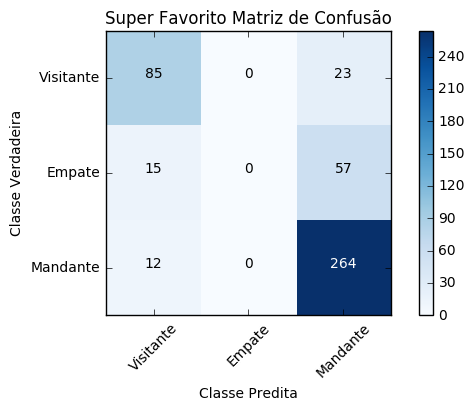

Matriz de Confusão Normalizada
[[ 0.78703704  0.          0.21296296]
 [ 0.20833333  0.          0.79166667]
 [ 0.04347826  0.          0.95652174]]


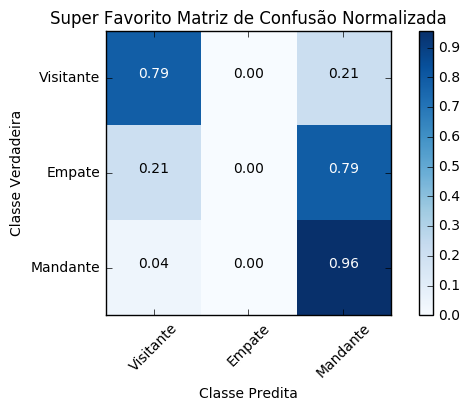

Matriz de Confusão
[[109   0 209]
 [ 51   6 216]
 [ 63   3 398]]


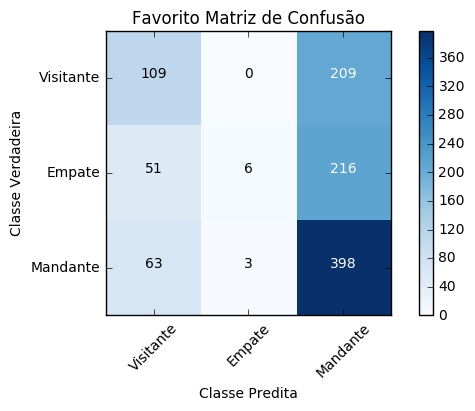

Matriz de Confusão Normalizada
[[ 0.3427673   0.          0.6572327 ]
 [ 0.18681319  0.02197802  0.79120879]
 [ 0.13577586  0.00646552  0.85775862]]


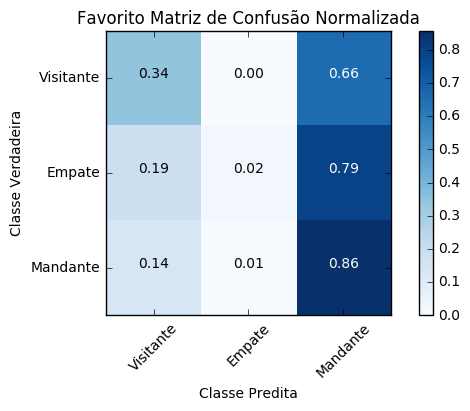

Matriz de Confusão
[[ 69  31 102]
 [ 57  35 100]
 [ 63  34 100]]


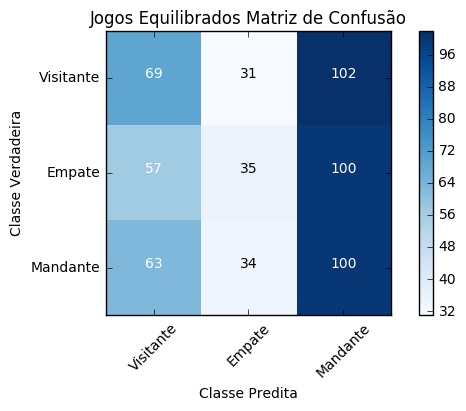

Matriz de Confusão Normalizada
[[ 0.34158416  0.15346535  0.5049505 ]
 [ 0.296875    0.18229167  0.52083333]
 [ 0.31979695  0.17258883  0.50761421]]


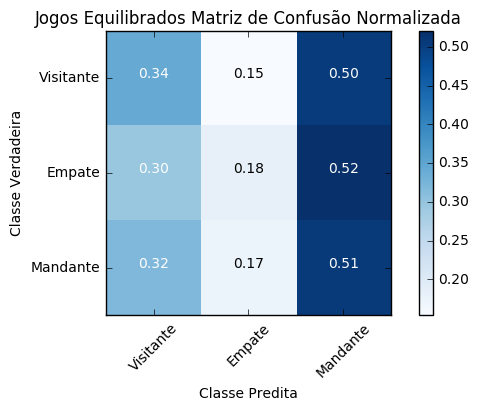

In [42]:
plt.figure()
plot_confusion_matrix(sf_cnf_matrix, classes=class_names, normalize=False,
                      title=u'Super Favorito Matriz de Confusão')
plt.show()
plt.figure()

plot_confusion_matrix(sf_cnf_matrix, classes=class_names, normalize=True,
                      title=u'Super Favorito Matriz de Confusão Normalizada')
plt.show()


plt.figure()
plot_confusion_matrix(f_cnf_matrix, classes=class_names, normalize=False,
                      title=u'Favorito Matriz de Confusão')
plt.show()
plt.figure()

plot_confusion_matrix(f_cnf_matrix, classes=class_names, normalize=True,
                      title=u'Favorito Matriz de Confusão Normalizada')
plt.show()


plt.figure()
plot_confusion_matrix(eq_cnf_matrix, classes=class_names, normalize=False,
                      title=u'Jogos Equilibrados Matriz de Confusão')
plt.show()
plt.figure()

plot_confusion_matrix(eq_cnf_matrix, classes=class_names, normalize=True,
                      title=u'Jogos Equilibrados Matriz de Confusão Normalizada')
plt.show()


In [25]:
f = open('sf_rf_max.pckl', 'wb')
pickle.dump(sf_rf_max, f)
f.close()

f = open('f_rf_max.pckl', 'wb')
pickle.dump(f_rf_max, f)
f.close()

f = open('eq_rf_max.pckl', 'wb')
pickle.dump(eq_rf_max, f)
f.close()